# Chess - Data Visualization and Logistic Regression Project 

## Notebook Preparation

In [1]:
# Import Libraries
#System
import os 

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import time

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'

#Chess
import chess


### Standarizing Visualizations

In [2]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None 
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_28392\1719351524.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [3]:
# Adding  datapoints values to line or bar plots

def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)

## Dataset Discovery

In [4]:
# Load Dataset
df = pd.read_csv('c:\\Users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\archive\\games.csv')

In [5]:
df.shape # 20058 Rows - 16 Columns

(20058, 16)

In [6]:
df.info() #Columns Name and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [7]:
#Detect NaN values
df.isna().sum() #The dataset contains 0 NaN Values

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [8]:
#Describe numerical variables.
df.describe() #Created_at and last_move_at are Dates. 

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [9]:
# Describe all columns of the Dataset

df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,2.005800e+04,2.005800e+04,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [10]:
# Number of unique Categorical Values by column
pd.DataFrame(df.describe(include='all').iloc[1]).dropna()

,unique
id,19113
rated,2
victory_status,4
winner,3
increment_code,400
white_id,9438
black_id,9331
moves,18920
opening_eco,365
opening_name,1477


In [11]:
# Duplicated Rows

print('Number of rows ' + str(df.shape[0]))

print('Number of duplicated rows ' + str(df.duplicated().value_counts()[1]))

#Remove duplicated in the DataFrame
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 20058
Number of duplicated rows 429
Number of rows after removing duplicated rows 19629


In [12]:
# Check Duplicated rowws by subset ()
print('Number of rows ' + str(df.shape[0]))
print('Number of rows by subset: ID, White ID, Black ID Moves and Turns ' + str(df.duplicated(subset=['id', 'white_id', 'black_id', 'moves', 'turns']).value_counts()[1]))
#Remove duplicated in the DataFrame
df.drop_duplicates(subset=['id', 'white_id', 'black_id', 'moves', 'turns'], keep='first', inplace=True, ignore_index=False)
print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 19629
Number of rows by subset: ID, White ID, Black ID Moves and Turns 516
Number of rows after removing duplicated rows 19113


In [13]:
print(f'Number of rows reomved {20058-19113}')

Number of rows reomved 945


In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
19109,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
19110,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
19111,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


## DateTime - Convert columns Created_at & Last_move_at

In [16]:
df.head(2) #Display 2 first rows of the Dataset

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [17]:
print('Epoch timestamp: '+str(df['created_at'][2])) #Display the value of the Column created_at in row with index 0

Epoch timestamp: 1504130000000.0


In [18]:
print('Epoch timestamp: '+str(df['last_move_at'][2])) #Display the value of the Column last_move_at in row with index 0

Epoch timestamp: 1504130000000.0


In [19]:
(df['created_at'] == df['last_move_at']).value_counts() #Checking if the values in created_at and last_move_at are the same. 8533 rows have the same created_at and last_move_at as value.

False    10580
True      8533
dtype: int64

In [20]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [21]:
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [22]:
df.head(2)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


## Column Analysis

### ID

In [23]:
#Checking ID as unique Identifier by Game.
display(df.shape[0]) 
display(df['id'].nunique()) 

19113

19113

### Rated

In [24]:
df['rated'].dtype # True | False Column

dtype('bool')

In [25]:
df['rated'].value_counts()# 16155 Matchs rated | 3903 matches not rated 

True     15467
False     3646
Name: rated, dtype: int64

In [26]:
df['rated'].value_counts(normalize=True) # Perentage of True and False

True     0.80924
False    0.19076
Name: rated, dtype: float64

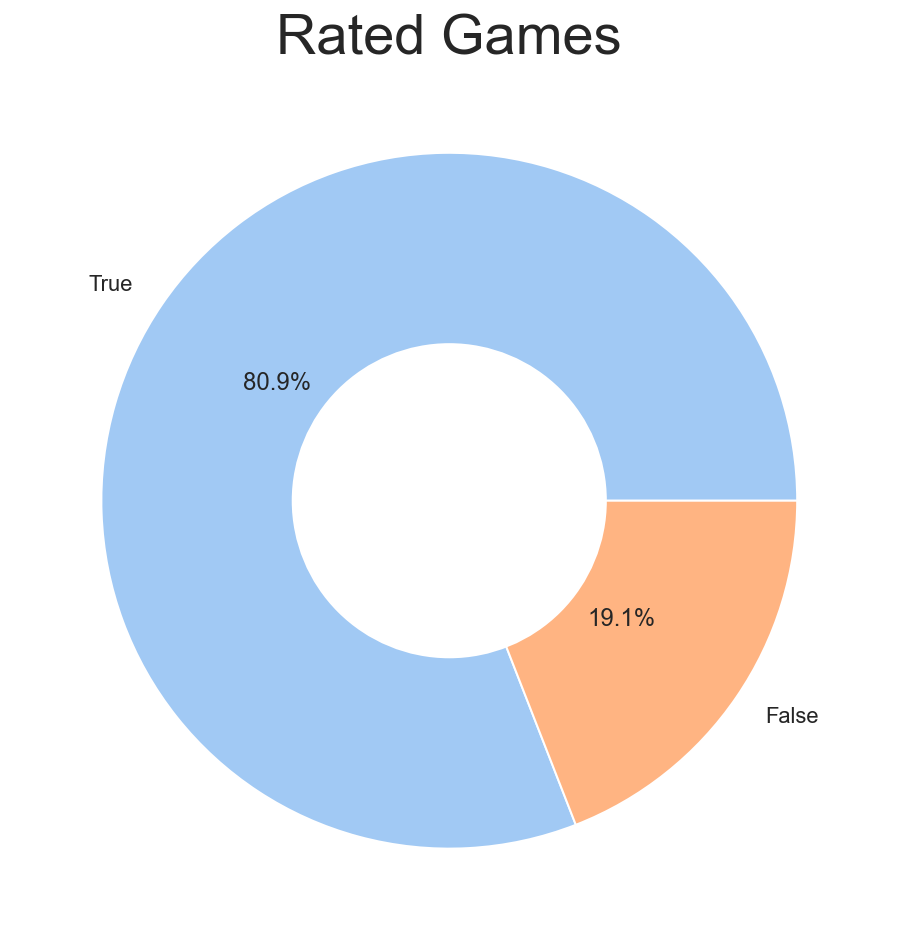

In [27]:
# create data
labels = ['True', 'False']
values = df['rated'].value_counts().to_list()
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.45, color='white')

# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Rated Games', fontsize=28)

#Save Plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//rated_games_percentage.png')

# Show the graph
plt.show()

### created_at

In [28]:
df['created_at'].max() #Last game in the dataset started on 2017-09-04

Timestamp('2017-09-04 02:45:43.790000128')

In [29]:
df['created_at'].min() #First game in the dataset started on 2013-08-17

Timestamp('2013-08-17 20:33:53.172999936')

In [30]:
#Create a separate column for years
df['created_at_year'] = pd.to_datetime(df['created_at']).dt.strftime("%Y")

In [31]:
#Games per year Table
df.groupby(df['created_at_year'])['id'].count()

created_at_year
2013       53
2014     1180
2015     1222
2016     3570
2017    13088
Name: id, dtype: int64

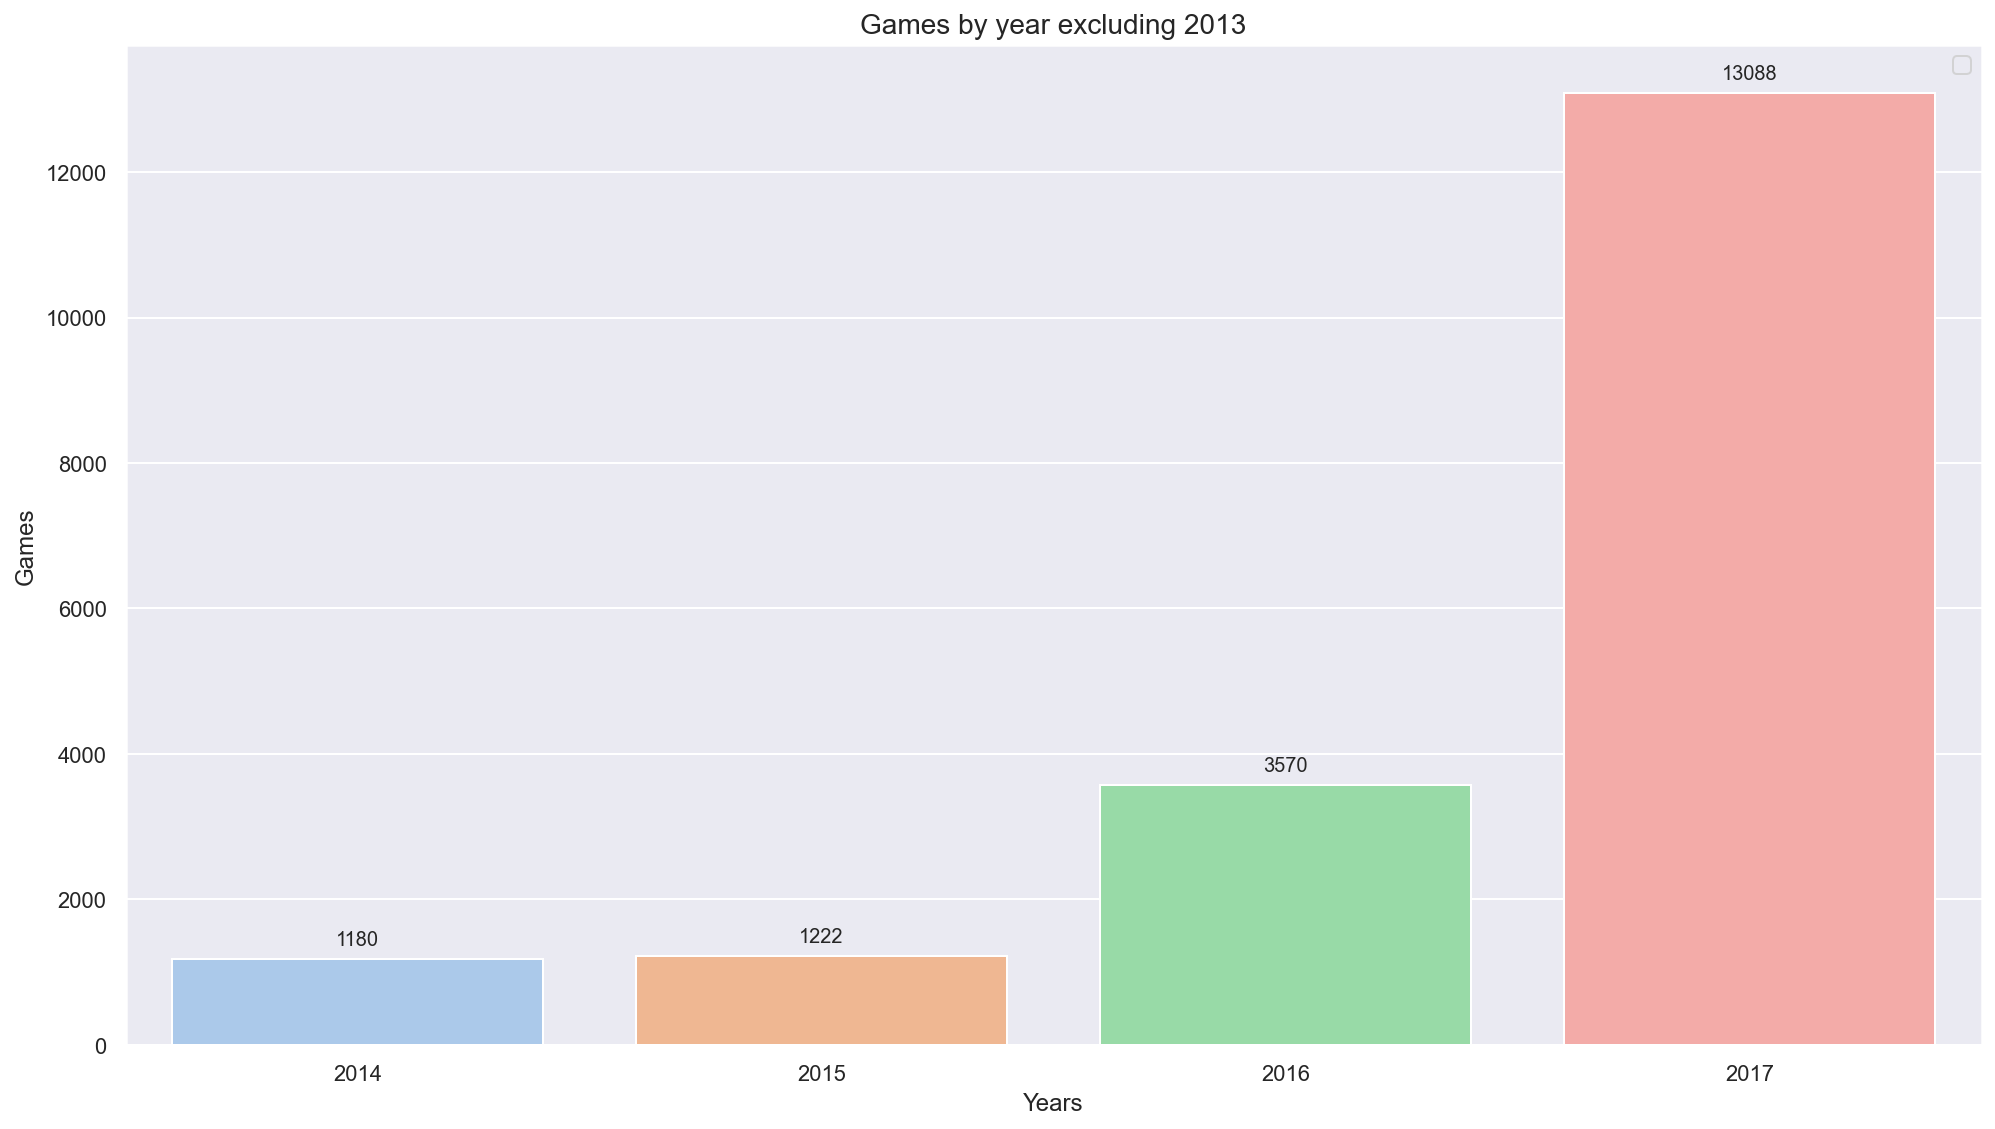

In [32]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df.groupby(df['created_at_year'])['id'].count()[1:].index, y=df.groupby(df['created_at_year'])['id'].count()[1:].values)
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the x - y axis
ax.set_ylabel('Games')
ax.set_xlabel('Years')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Games by year excluding 2013', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#fit the layout
plt.tight_layout()
#Save Plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//games_by_year.png')
#Plot the barchart
plt.show()

In [33]:
df.groupby(df['created_at_year'])['white_id'].nunique()

created_at_year
2013      37
2014     645
2015     652
2016    1916
2017    6470
Name: white_id, dtype: int64

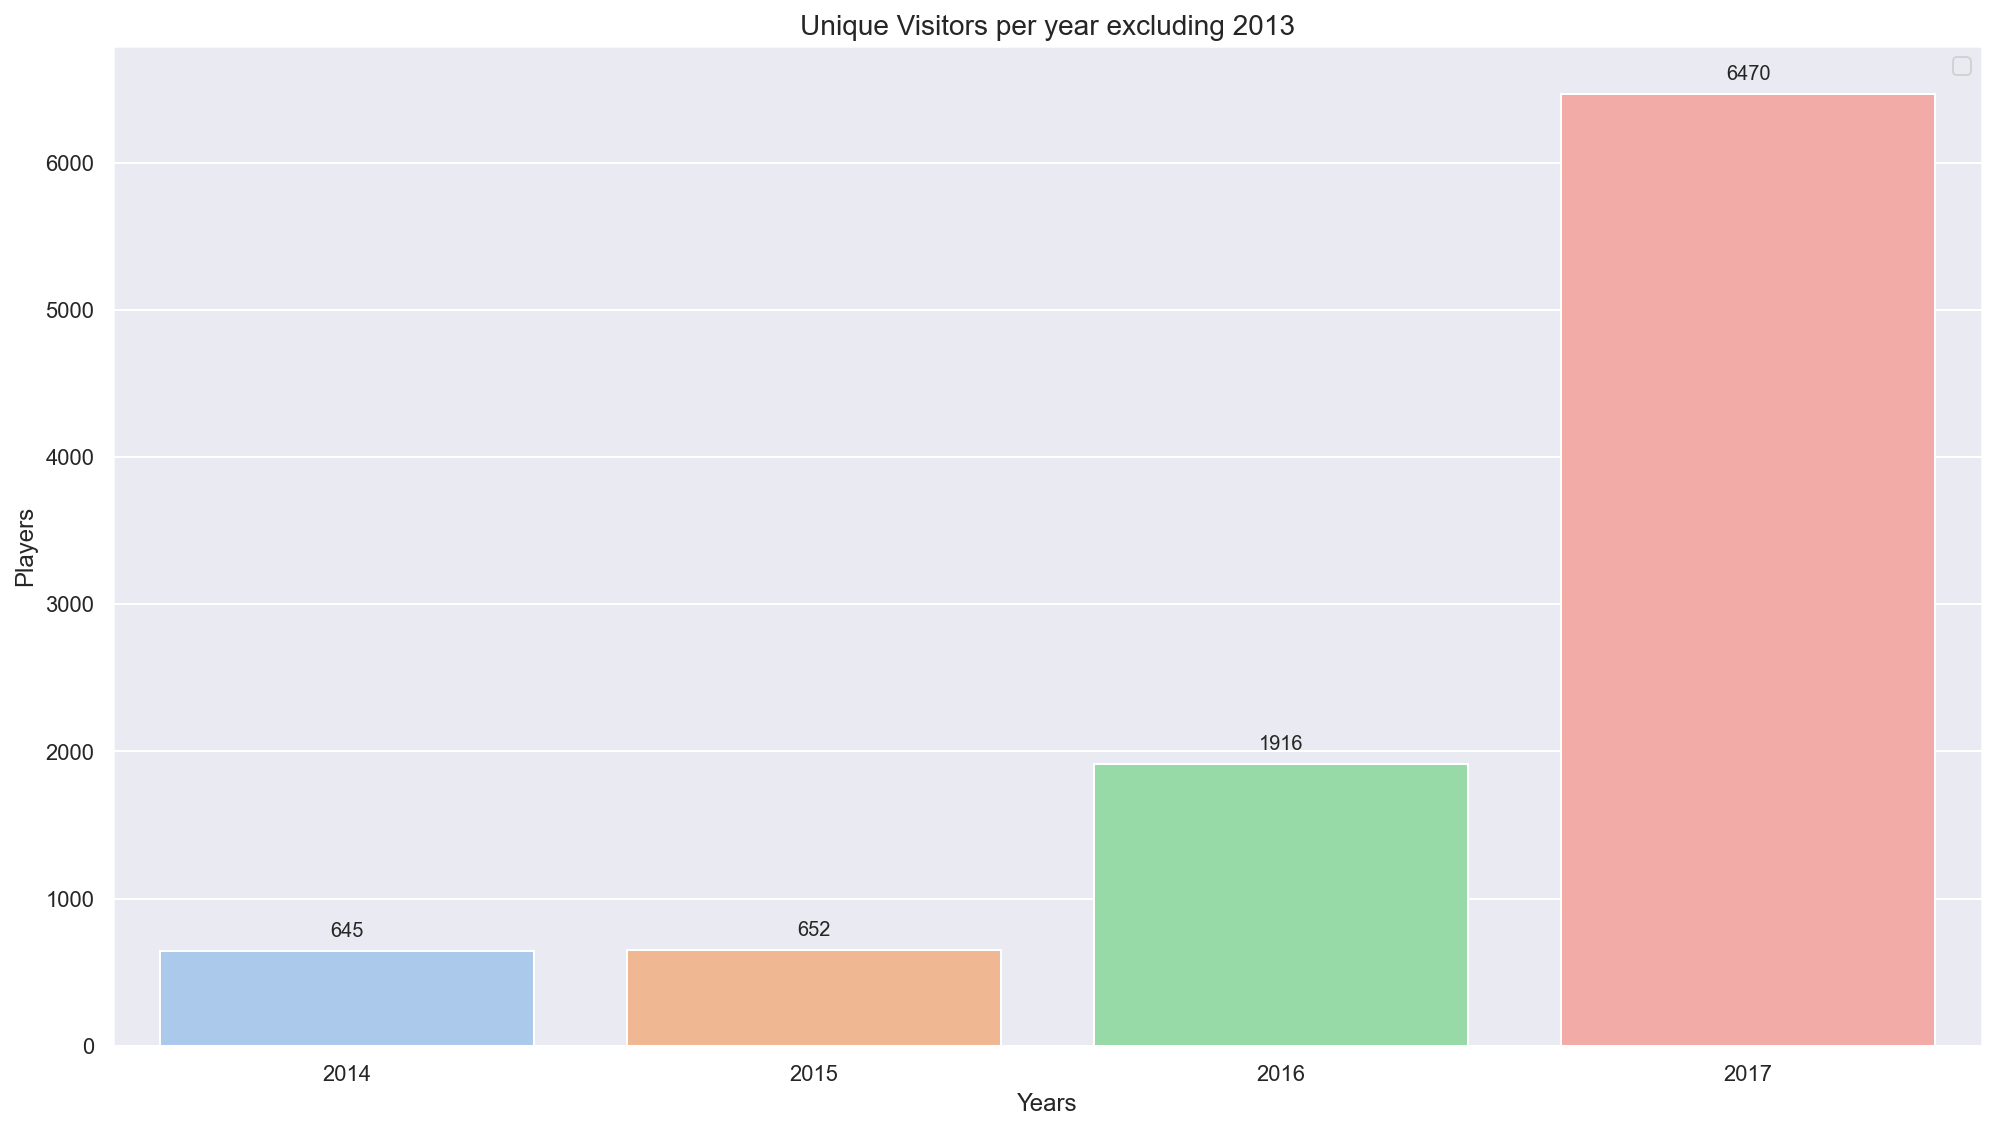

In [34]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df.groupby(df['created_at_year'])['white_id'].nunique()[1:].index, y=df.groupby(df['created_at_year'])['white_id'].nunique()[1:].values)
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the x - y axis
ax.set_ylabel('Players')
ax.set_xlabel('Years')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Unique Visitors per year excluding 2013', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#fit the layout to
plt.tight_layout()
#Save Plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//Unique_Players_Year.png')
#Plot the barchart
plt.show()

### Game Duration |  created at - last move at

In [35]:
#Duration of the gamnes
df['game_duration']  = df['last_move_at']-df['created_at']

In [36]:
#Game duration in minutes 
df['game_duration'] = (df['game_duration'].dt.total_seconds()/60).round() #There are about 8000 matches with duration = 0.

In [37]:
df['game_duration'].describe()

count    19113.000000
mean        14.568880
std         82.144076
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max      10097.000000
Name: game_duration, dtype: float64

In [38]:
df['game_duration'].median() # Most of the Games last 3 minutes

3.0

In [39]:
# Modification of the incremental_code to get the max duration of the match. They will be used as bins to plot the Max duration of games
df['game_duration_bins'] = df['increment_code'].str.split('+').str[0] 

In [40]:
#Chage the Dtype of the columns to integuer
df['game_duration_bins'] = df['game_duration_bins'].astype('int32')

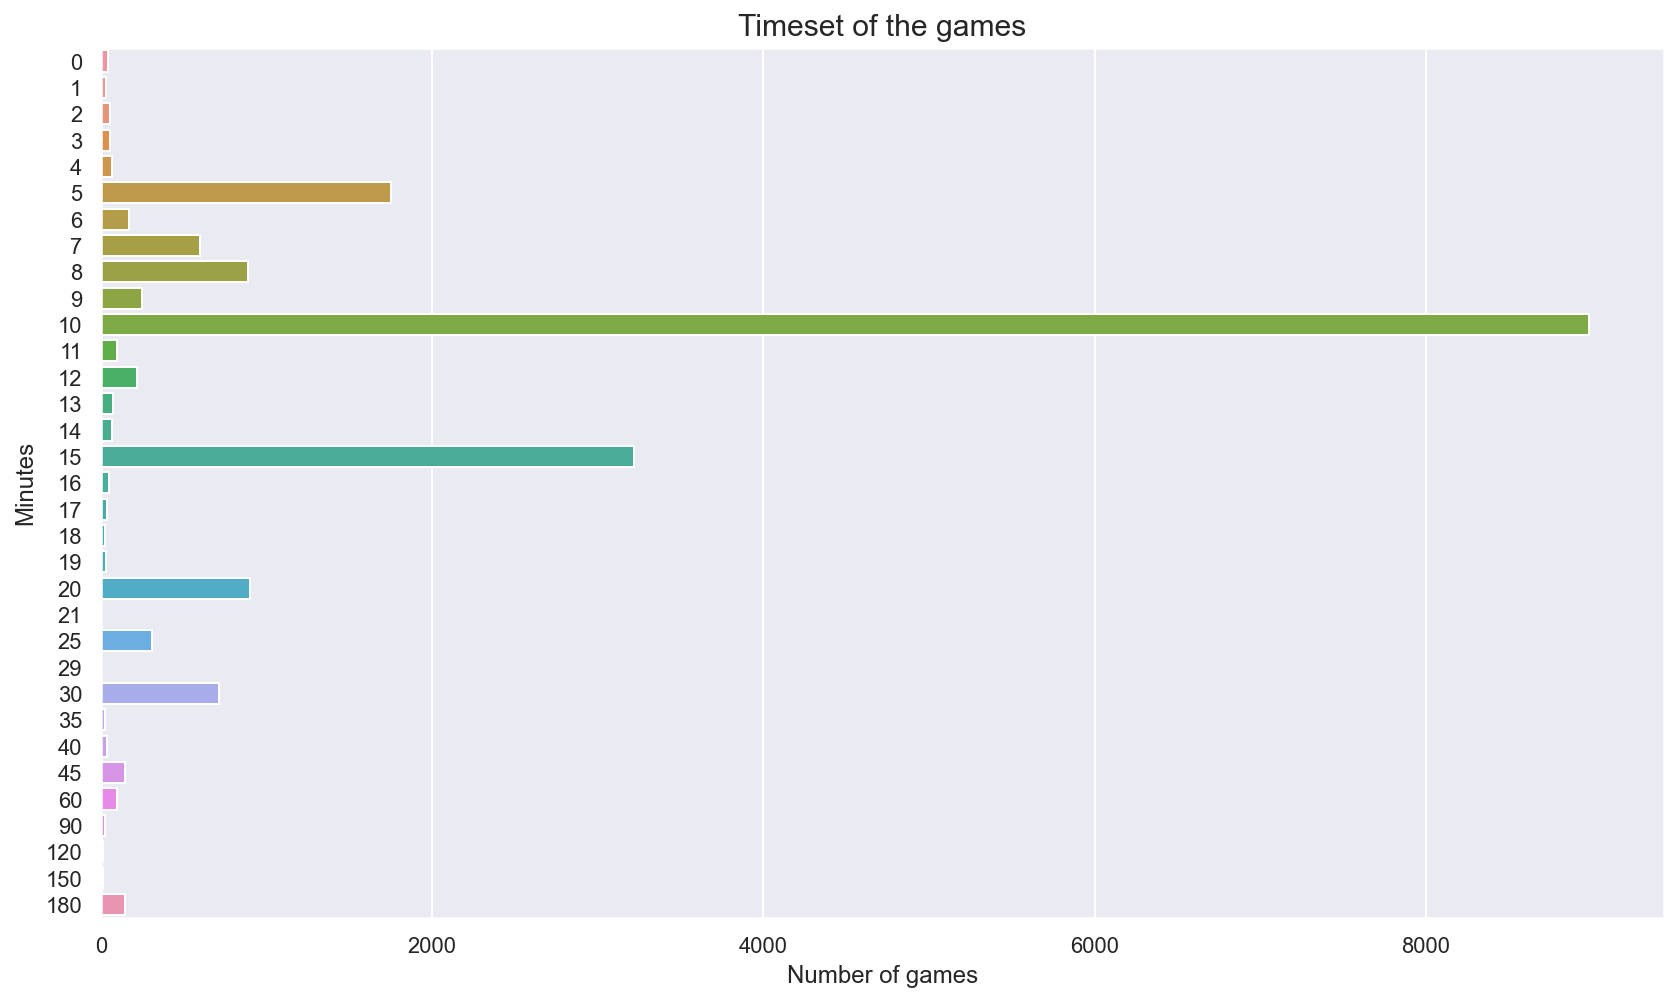

In [41]:
#Plot the Max Duration of Games 
ax = df.groupby(df['game_duration_bins'])['id'].count().reset_index().sort_values(by='game_duration_bins').set_index('game_duration_bins')
#Horizontal Barplot
sns.barplot(data=ax, y=ax.index, x=ax['id'].values, orient='h')
# x, y axis labels
plt.xlabel('Number of games')
plt.ylabel('Minutes')
# Title of the Plot
plt.title('Timeset of the games', size=15)
#Save the plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//games_by_Max_duration.png')
#Plot the barchart
plt.show()


### Turns

In [42]:
#Describe Turns 
df['turns'].describe()

count    19113.000000
mean        60.513839
std         33.488264
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

In [43]:
#Group turns in Bins to plot them.
df['turns_bins'] = pd.cut(df['turns'], bins=20)

In [44]:
# Table to be plot- 
df['turns_bins'].value_counts().sort_index()

(0.652, 18.4]     1412
(18.4, 35.8]      3015
(35.8, 53.2]      4663
(53.2, 70.6]      3901
(70.6, 88.0]      2579
(88.0, 105.4]     1523
(105.4, 122.8]    1003
(122.8, 140.2]     559
(140.2, 157.6]     272
(157.6, 175.0]     124
(175.0, 192.4]      33
(192.4, 209.8]      18
(209.8, 227.2]       8
(227.2, 244.6]       0
(244.6, 262.0]       2
(262.0, 279.4]       0
(279.4, 296.8]       0
(296.8, 314.2]       0
(314.2, 331.6]       0
(331.6, 349.0]       1
Name: turns_bins, dtype: int64

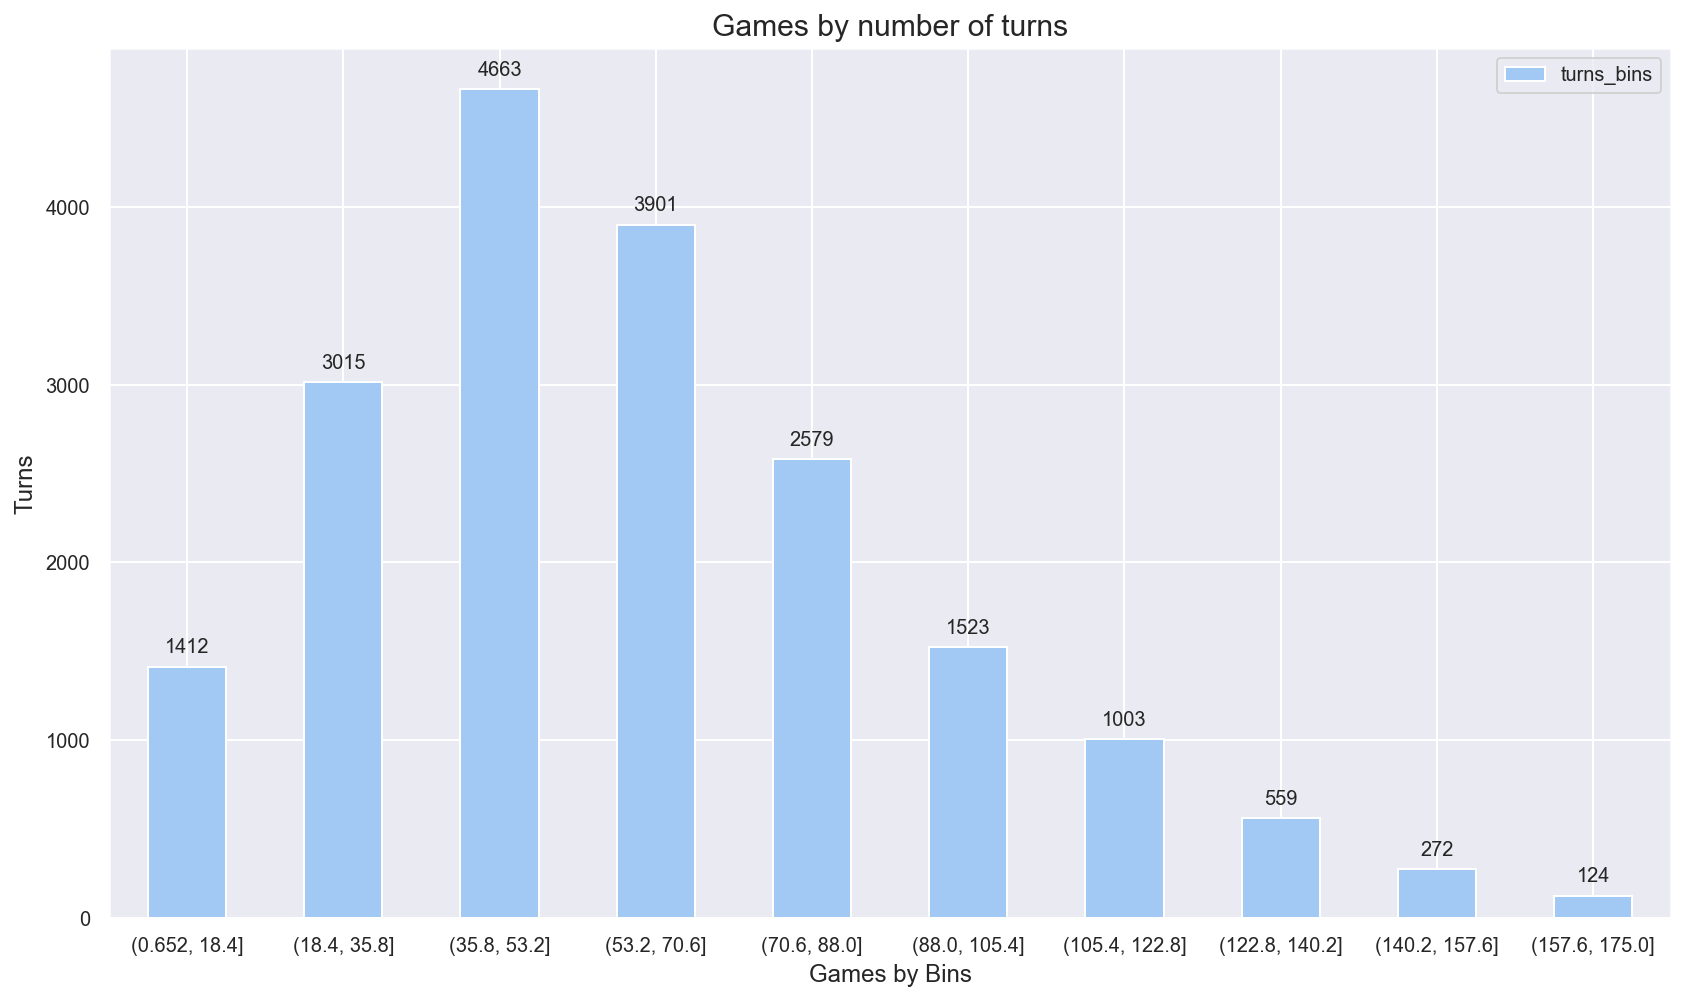

In [45]:
#Plot the Max Duration of Games 
ax = df['turns_bins'].value_counts().sort_index().head(10).plot(kind='bar')
#Horizontal Barplot
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(labels, fontsize=10)
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# x, y axis labels
plt.xlabel('Games by Bins')
plt.ylabel('Turns')
# Title of the Plot
plt.title('Games by number of turns', size=15)
add_value_labels(ax, 'bar', spacing=5)
#Save the plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//Turns_bins.png')
#Plot the barchart

plt.show()


### victory_status

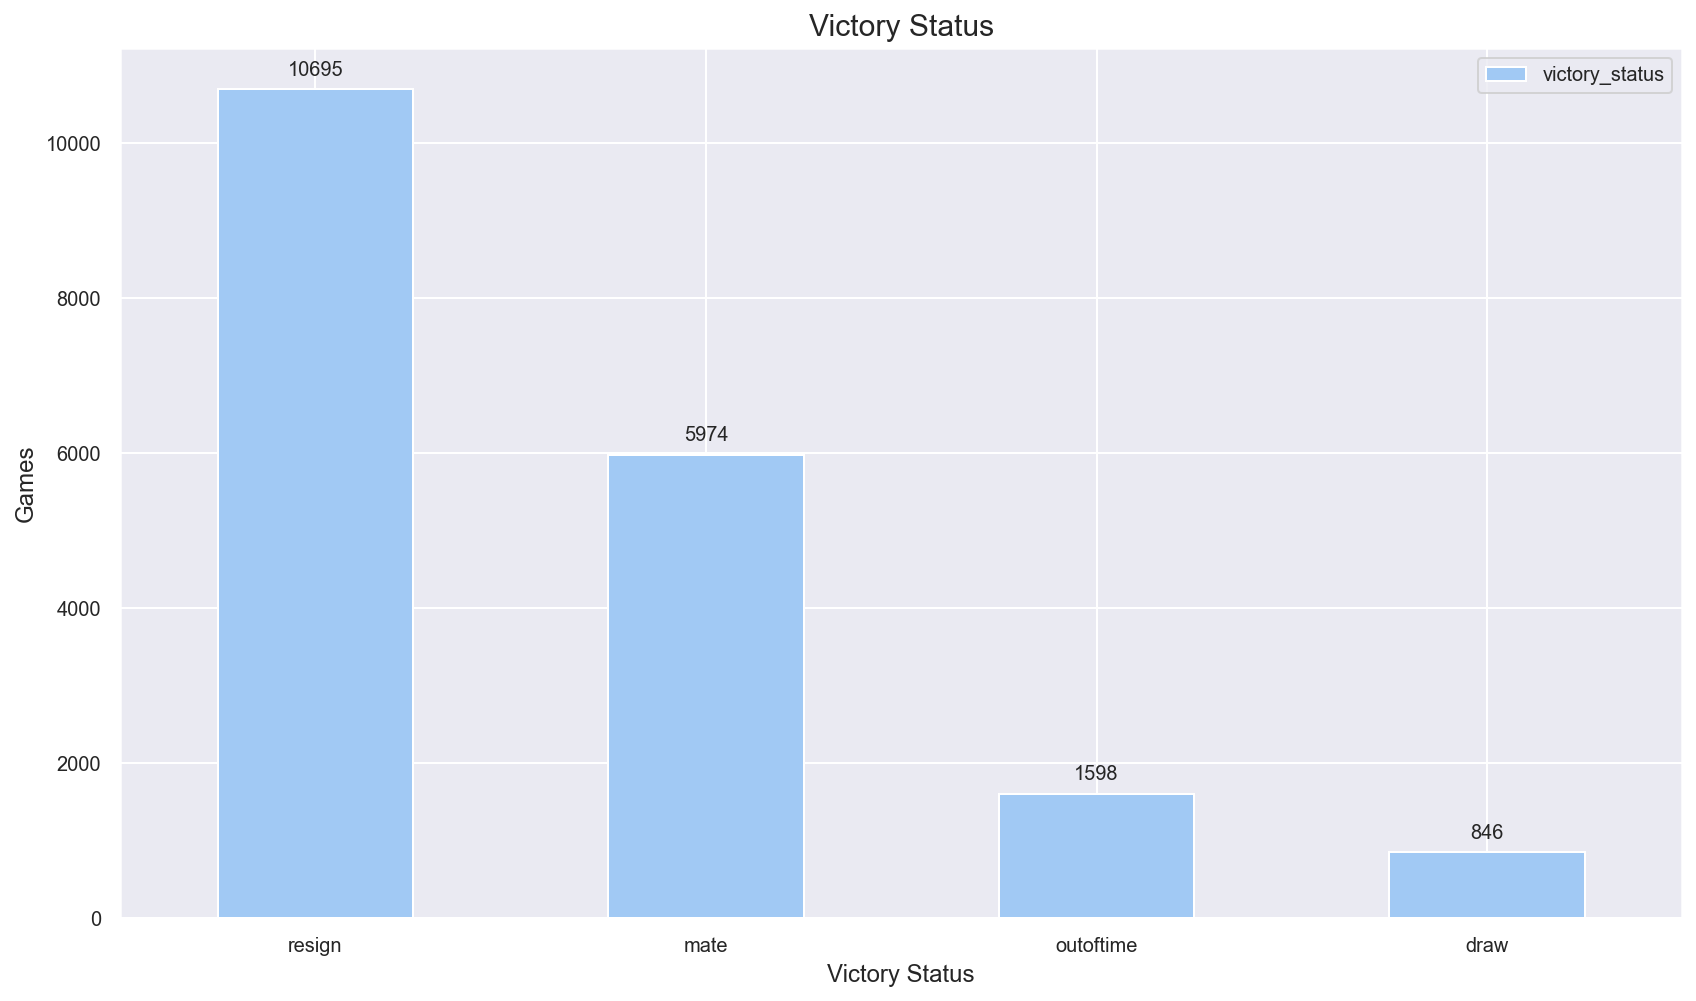

In [46]:
ax = df['victory_status'].value_counts().plot(kind='bar')
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(labels, fontsize=10)
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# x, y axis labels
plt.xlabel('Victory Status')
plt.ylabel('Games')
# Title of the Plot
plt.title('Victory Status', size=15)
add_value_labels(ax, 'bar', spacing=5)
#Save the plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//Victory_status.png')
#Plot the barchart

plt.show()


### winner

In [47]:
# Target Feature
df['winner'].value_counts()

white    9545
black    8680
draw      888
Name: winner, dtype: int64

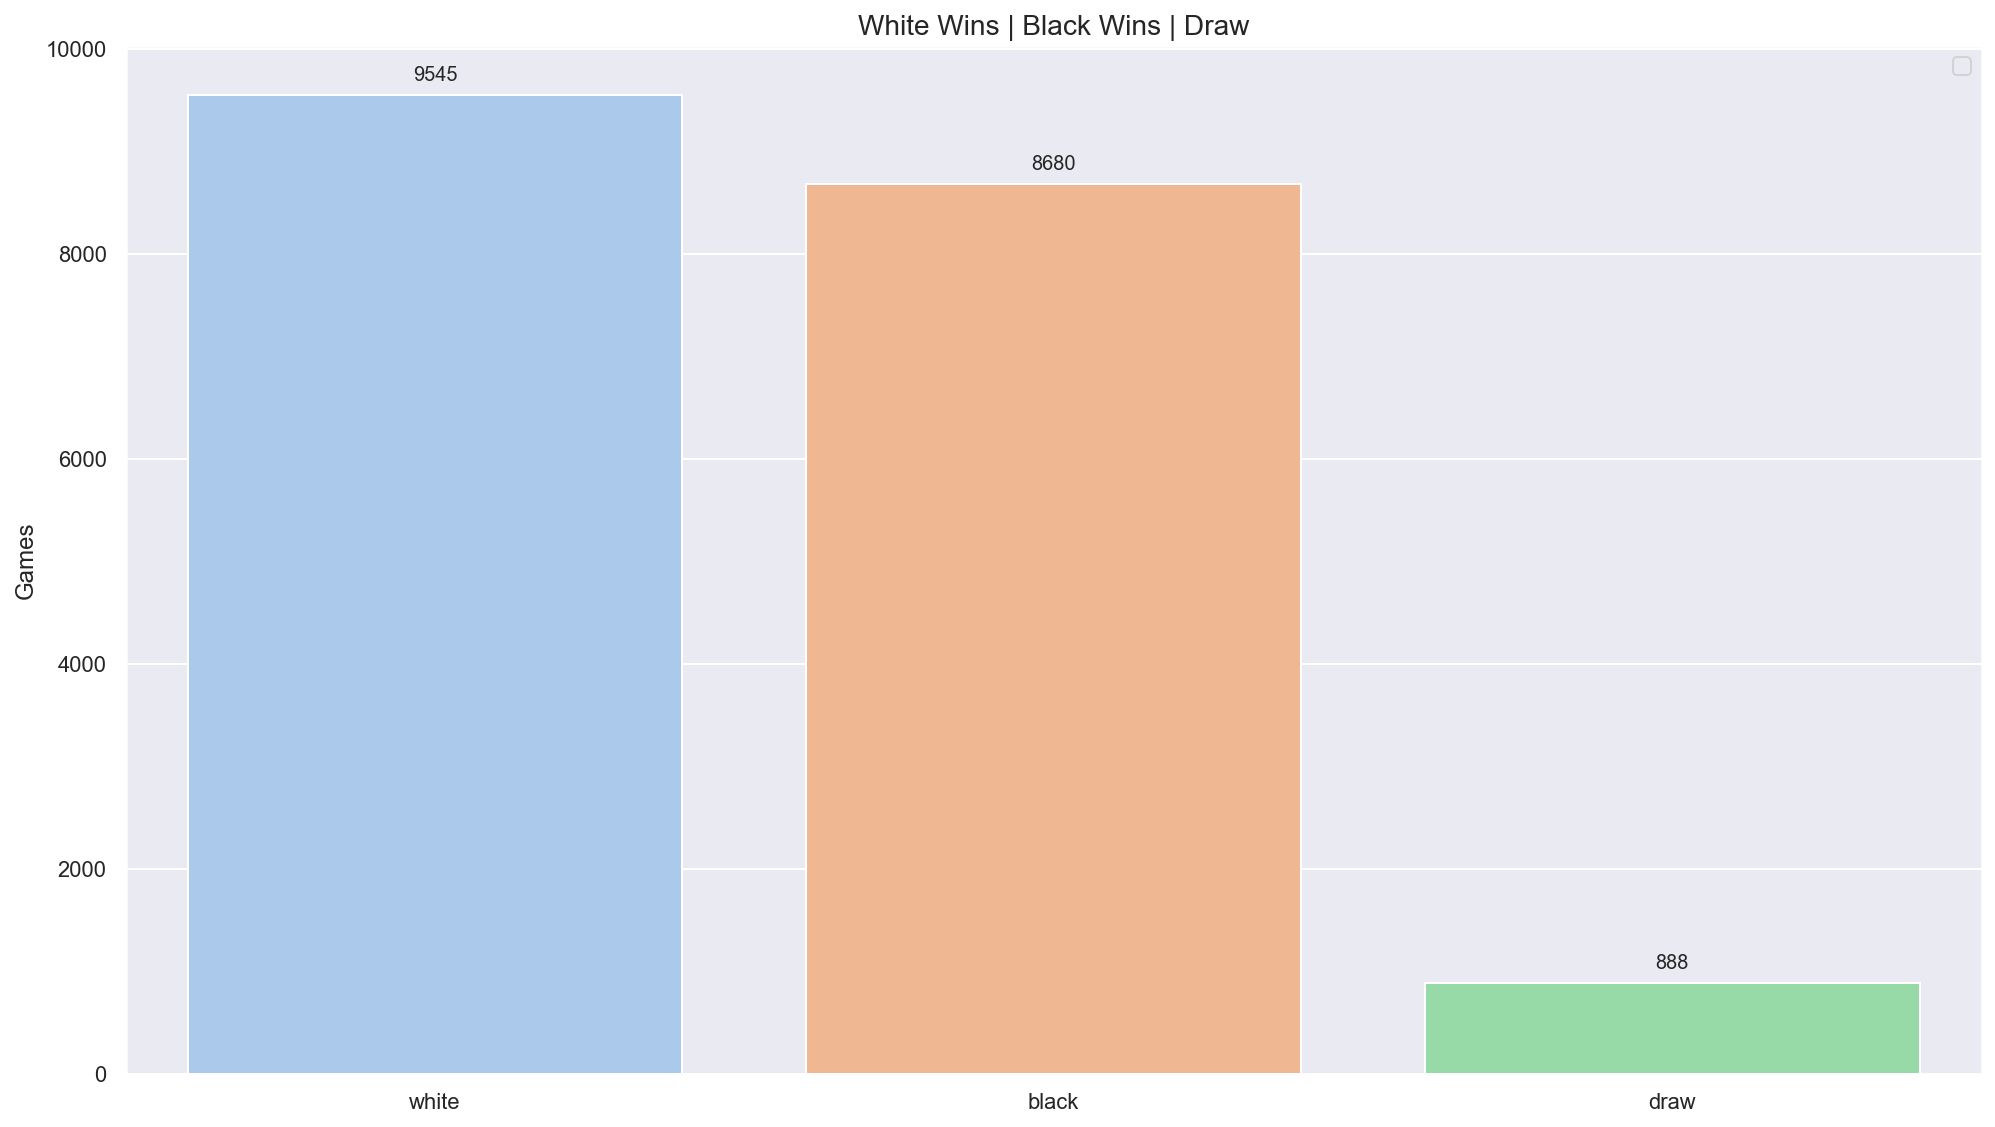

In [48]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df['winner'].value_counts().index, y=df['winner'].value_counts().values)
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the x - y axis
ax.set_ylabel('Games')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('White Wins | Black Wins | Draw', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#fit the layout to
plt.tight_layout()
#Save Plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//White_Black_Draw.png')
#Plot the barchart
plt.show()

### white_id

In [49]:
#Number of unique values.
df['white_id'].nunique()

9438

In [50]:
#Top users 20 with white.

df['white_id'].value_counts().head(20)

ssf7               48
bleda              48
hassan1365416      44
khelil             41
1240100948         38
ozguragarr         38
ivanbus            36
vovkakuz           35
islam01            31
ozil17             30
trial-__gre        29
thebadfish         29
saeed65            28
tetley             27
lance5500          26
aaaaaaaddd         26
ranchowangdu       26
fandm-lancaster    26
kevchod            26
unrim              25
Name: white_id, dtype: int64

In [51]:
#Top winners with white
df.loc[df['winner'] == 'white'].groupby(df['white_id'])['id'].count().sort_values(ascending=False).head(20)

white_id
ssf7             29
hassan1365416    28
1240100948       22
ozil17           21
traced           21
ozguragarr       21
trial-__gre      20
khelil           20
lance5500        19
ranchowangdu     19
doraemon61       18
fabian1104       18
chesscarl        18
flafel26         18
ivanbus          18
elvis1997        17
dhernandez101    17
apis11           17
spiteknight      17
thebadfish       17
Name: id, dtype: int64

### white_rating

In [52]:
# Describe White rating
df['white_rating'].describe()

count    19113.000000
mean      1597.300005
std        290.022740
min        784.000000
25%       1401.000000
50%       1567.000000
75%       1792.000000
max       2700.000000
Name: white_rating, dtype: float64

In [53]:
# Max white id rating
df['white_rating'].max()

2700

In [54]:
# Min white id rating
df['white_rating'].min()

784

### black_id

In [55]:
df['black_id'].nunique()

9331

In [56]:
df['black_id'].value_counts().head(20)

docboss               44
cape217               38
amanan                33
erikweisz             31
jdbarger              30
vladimir-kramnik-1    30
andreas00             29
pat222                29
dipset                29
blazingdragon         29
chesscarl             28
aran09                28
mukrisp               27
wojand                27
crixin                27
tahastanly            27
robixy                27
jakubsagitario17      27
fazouane              27
mrmandelbrot          26
Name: black_id, dtype: int64

In [57]:
#Top winners with black
df.loc[df['winner'] == 'black'].groupby(df['black_id'])['id'].count().sort_values(ascending=False).head(20)

black_id
chesscarl           27
docboss             25
smilsydov           21
doraemon61          20
cape217             18
sjeiben             18
dpoty               18
youralterego        17
amanan              17
s-a                 17
unrim               17
pavelsps            16
lbringer            16
elvis1997           16
rodrigowski19       16
ducksandcats        16
brandonbos          16
robixy              15
jakubsagitario17    15
divu7               15
Name: id, dtype: int64

### black_rating

In [58]:
# Describe Black_Rating

df['black_rating'].describe()

count    19113.000000
mean      1590.045519
std        290.441694
min        789.000000
25%       1394.000000
50%       1563.000000
75%       1785.000000
max       2723.000000
Name: black_rating, dtype: float64

In [59]:
# Max Black_rating 

df['black_rating'].max()


2723

In [60]:
#Min Black rating

df['black_rating'].min()

789

### Moves - Split White moves and black moves

In [61]:

df['moves'][0].split()
    

['d4',
 'd5',
 'c4',
 'c6',
 'cxd5',
 'e6',
 'dxe6',
 'fxe6',
 'Nf3',
 'Bb4+',
 'Nc3',
 'Ba5',
 'Bf4']

In [62]:
#Create two new columns with the white and black moves in separate columns
white_move = []
black_move = []
i = 0
for row in df['moves']:
    for index, move in enumerate(row.split()): 
        if index % 2 == 0:
            white_move.append(move)
            
        else:
            black_move.append(move)

         
    df.loc[i, 'white_move'] = str(white_move)
    df.loc[i, 'black_move'] = str(black_move)
    i = i+1
    if i == len(df):
        break
    white_move = []
    black_move = []

In [63]:
#Create a clen list of the moves
df['black_move'][0].rstrip(']').lstrip('[').replace("'", "").replace(',', '').split()

['d5', 'c6', 'e6', 'fxe6', 'Bb4+', 'Ba5']

In [64]:
# Apply the above transformation to the black_move and white_move columns
df['black_move'] = df['black_move'].apply(lambda x : (x).rstrip(']').lstrip('[').replace("'", "").replace(',', '').split())
df['white_move'] = df['white_move'].apply(lambda x : (x).rstrip(']').lstrip('[').replace("'", "").replace(',', '').split())

In [65]:
df['white_move']

0                      [d4, c4, cxd5, dxe6, Nf3, Nc3, Bf4]
1                  [d4, e4, f4, dxe5, fxe5, Qd4, Qe5+, c4]
2        [e4, d3, Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c...
3        [d4, Nf3, Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra...
4        [e4, Nf3, d4, d5, a3, Nc3, b4, Bg5, b5, Bxf6, ...
                               ...                        
19108    [d4, e3, Nf3, Nc3, Be2, O-O, Ne5, Bh5+, Nxg6, ...
19109    [d4, Bf4, Bg3, e3, exd4, c3, Bd3, Nd2, Kf1, hx...
19110    [d4, Bf4, e3, c3, Nf3, Bd3, Nbd2, Ne5, Bxe5, B...
19111    [e4, d4, e5, dxe5, Kxd1, c4, c5, Bc4, Bxd5, Nc...
19112    [d4, Bf4, e3, c3, Nf3, Nbd2, Bd3, e4, e5, Nxe4...
Name: white_move, Length: 19113, dtype: object

In [66]:
df['black_move']

0                            [d5, c6, e6, fxe6, Bb4+, Ba5]
1               [Nc6, e5, f6, fxe5, Nxe5, Nc6, Nxe5, Bb4+]
2        [e5, d6, c6, b5, a5, c5, Nc6, Ra6, a4, a3, Rxa...
3        [d5, Bf5, Nf6, Ng4, Nc6, Qd7, O-O-O, Nb4, Nxa2...
4        [e5, d6, Nc6, Nb4, Na6, Be7, Nf6, O-O, Nc5, Bx...
                               ...                        
19108    [f5, e6, Nf6, b6, Bb7, Be7, d6, g6, hxg6, Kf8,...
19109    [d6, e5, Nf6, exd4, d5, Bd6, O-O, Re8+, Bxg3, ...
19110    [d5, Nc6, Nf6, e6, Be7, O-O, b6, Nxe5, Nd7, Kx...
19111    [d6, Nf6, dxe5, Qxd1+, Nd5, Nb6, Nd5, e6, exd5...
19112    [d5, Na6, e6, Nf6, Bd7, b5, Qc8, b4, Ne4, dxe4...
Name: black_move, Length: 19113, dtype: object

### opening_eco

In [67]:
#Most used opennig by code 
df['opening_eco'].value_counts().head(20)

A00    948
C00    810
D00    701
B01    688
C41    650
C20    646
A40    606
B00    574
B20    551
C50    500
C40    427
D02    412
C44    355
C42    313
B07    296
C55    294
C45    269
C02    268
A04    250
C46    250
Name: opening_eco, dtype: int64

In [68]:
df['opening_eco']

0        D10
1        B00
2        C20
3        D02
4        C41
        ... 
19108    A80
19109    A41
19110    D00
19111    B07
19112    D00
Name: opening_eco, Length: 19113, dtype: object

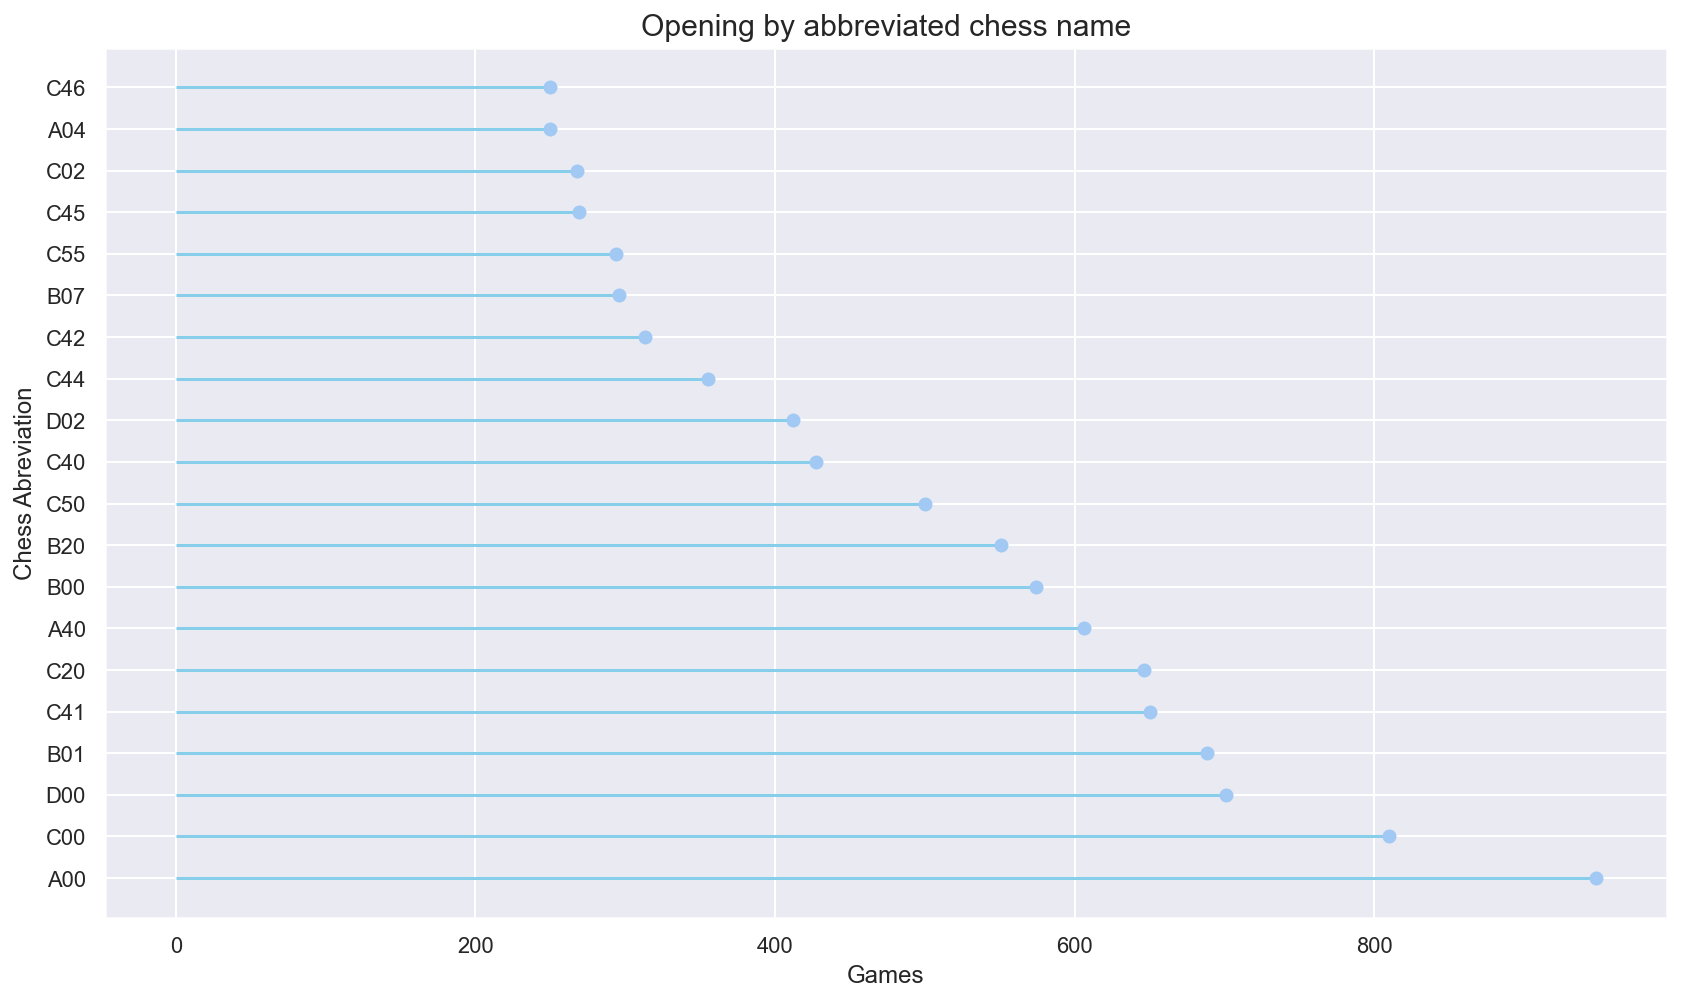

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Create a dataframe
 
# Reorder it based on the values
ordered_df = df['opening_eco'].value_counts().head(20)
my_range=range(1,len(ordered_df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df.values, color='skyblue')
plt.plot(ordered_df.values, my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Opening by abbreviated chess name", size=15)
plt.xlabel('Games')
plt.ylabel('Chess Abreviation')

plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//Lolipop_opening_eco.png')

# Show the plot
plt.show()

In [70]:
#Data quality verficiation
df.loc[df['opening_eco']=='A00'].head(1)
# https://www.365chess.com/eco.php
# Starting with e3 - is A00 - Van't Krugist openning


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,moves,opening_eco,opening_name,opening_ply,created_at_year,game_duration,game_duration_bins,turns_bins,white_move,black_move
10,HgKLWPsz,False,2017-08-21 21:13:20,2017-08-21 21:13:20,39,mate,white,20+60,daniel_likes_chess,1381,...,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Van't Kruijs Opening,1,2017,0.0,20,"(35.8, 53.2]","[e3, d4, Bd3, Nf3, Nc3, Bd2, Qe2, dxc5, O-O, R...","[e6, d6, c6, Be7, Nf6, Bd7, c5, dxc5, b6, Bc6,..."


In [71]:
#View of the opening_eco 

df['opening_eco'].unique()

array(['D10', 'B00', 'C20', 'D02', 'C41', 'B27', 'D00', 'C50', 'B01',
       'A00', 'C02', 'C00', 'C57', 'C55', 'A40', 'B20', 'A25', 'B21',
       'D01', 'C45', 'D06', 'B52', 'D20', 'B06', 'A45', 'B77', 'A21',
       'B70', 'B23', 'B76', 'C21', 'A80', 'A20', 'A04', 'C26', 'C44',
       'E10', 'A41', 'C01', 'A10', 'C18', 'A47', 'C10', 'D80', 'D30',
       'D41', 'A46', 'D31', 'C64', 'C24', 'A43', 'A08', 'B03', 'B29',
       'B02', 'B13', 'B57', 'E20', 'E11', 'C40', 'C11', 'C28', 'B30',
       'A56', 'C65', 'B90', 'B50', 'B51', 'E00', 'C70', 'B11', 'B22',
       'B40', 'B31', 'B18', 'C61', 'C78', 'B10', 'C22', 'C54', 'C68',
       'B12', 'C77', 'A42', 'C42', 'D07', 'B32', 'A22', 'C46', 'B07',
       'A06', 'C60', 'A07', 'A02', 'C58', 'A03', 'B54', 'D03', 'C69',
       'A31', 'D46', 'C34', 'C48', 'C47', 'B24', 'C67', 'E61', 'C53',
       'C23', 'B96', 'A05', 'D92', 'A49', 'C37', 'A09', 'A01', 'C88',
       'B34', 'C03', 'C33', 'A48', 'A11', 'A81', 'B05', 'B53', 'B08',
       'C30', 'A15',

In [72]:
#Number of different opening eco
df['opening_eco'].nunique()

365

### 'opening_name'

In [73]:
#Most used openings by name
df['opening_name'].value_counts()

Sicilian Defense                                                       349
Van't Kruijs Opening                                                   342
Sicilian Defense: Bowdler Attack                                       290
French Defense: Knight Variation                                       260
Scotch Game                                                            254
                                                                      ... 
King's Indian Defense: Orthodox Variation |  Donner Defense              1
French Defense: Winawer Variation |  Retreat Variation                   1
Sicilian Defense: O'Kelly Variation |  Maroczy Bind |  Paulsen Line      1
Queen's Gambit Declined: Been-Koomen Variation                           1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation             1
Name: opening_name, Length: 1477, dtype: int64

In [74]:
df['opening_name'].value_counts().head(7)

Sicilian Defense                                 349
Van't Kruijs Opening                             342
Sicilian Defense: Bowdler Attack                 290
French Defense: Knight Variation                 260
Scotch Game                                      254
Scandinavian Defense: Mieses-Kotroc Variation    247
Queen's Pawn Game: Mason Attack                  227
Name: opening_name, dtype: int64

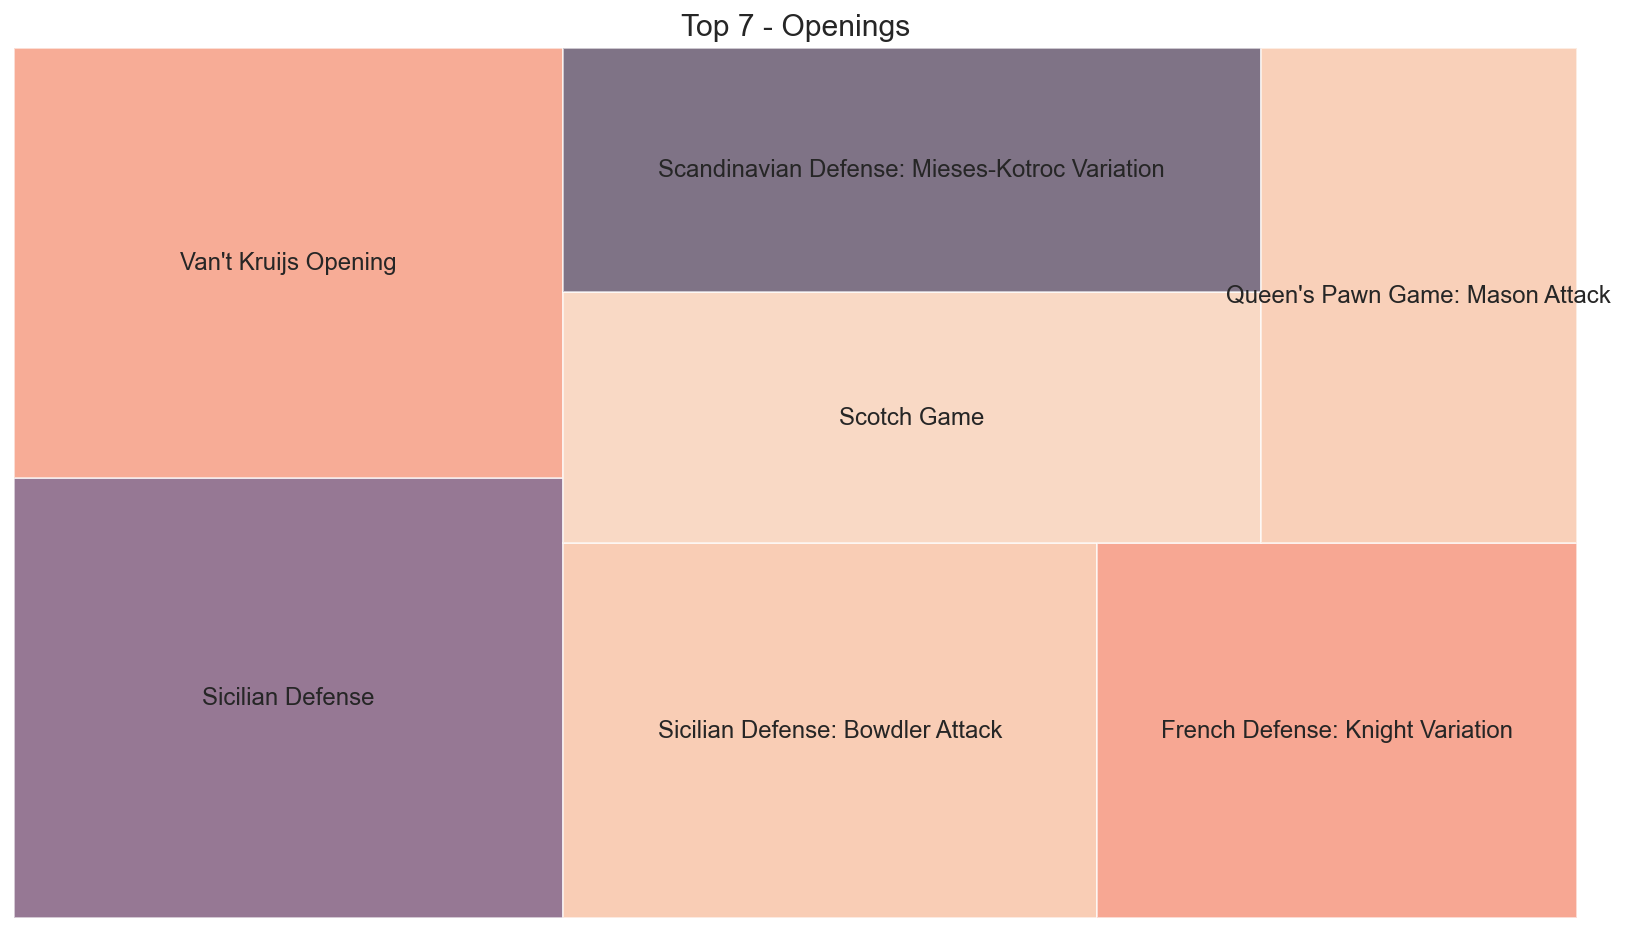

In [75]:
# libraries

import squarify    # pip install squarify (algorithm for treemap)


# plot it
squarify.plot(sizes=df['opening_name'].value_counts().head(7).values, label=df['opening_name'].value_counts().head(7).index, alpha=.6 )
plt.title('Top 7 - Openings', size=15)
plt.axis('off')
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//Tree_Map_Openings.png')
plt.show()

In [76]:
#View of the unique categorical values of this columsn
df['opening_name'].unique()

array(['Slav Defense: Exchange Variation',
       'Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)

In [77]:
#Number of unique Categorical values 

df['opening_name'].nunique()

1477

### opening_ply

In [78]:
df['opening_ply'].describe()

count    19113.000000
mean         4.815780
std          2.798283
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: opening_ply, dtype: float64

In [79]:
#Number of moves in the opening phase
df['opening_ply'].value_counts()

3     3335
4     3157
2     2809
5     2600
6     1920
7     1281
8     1055
1     1032
9      656
11     409
10     409
12     136
13     118
14      53
15      41
17      35
16      30
18      12
19      11
20       8
28       4
22       1
24       1
Name: opening_ply, dtype: int64

## TOP CHESS PLAYERS

In [81]:
#List of unique players in white_id column + list of unique players in black_id
df_players = pd.concat([
    pd.DataFrame(df['white_id'].unique(), columns=['Player']),
    pd.DataFrame(df['black_id'].unique(), columns=['Player'])
    
])

In [82]:
#Remove Players
df_players.drop_duplicates(inplace=True)

In [83]:
#Create Ranking table for Players
df_players['Games_White'] = df_players['Player'].map(df['white_id'].value_counts())
df_players['Games_Black'] = df_players['Player'].map(df['black_id'].value_counts())
df_players.fillna(0, inplace=True)
df_players['Total_Games'] = df_players['Games_White'] + df_players['Games_Black']
df_players['White_Winner'] = df_players['Player'].map(df.loc[df['winner'] == 'white'].groupby(df['white_id'])['id'].count()).fillna(0)
df_players['Black_Winner'] =  df_players['Player'].map(df.loc[df['winner'] == 'black'].groupby(df['black_id'])['id'].count()).fillna(0)
df_players['Total_Wins'] = df_players['White_Winner'] + df_players['Black_Winner']
df_players['Max_White_Rating'] = df_players['Player'].map(df.groupby('white_id')['white_rating'].max())
df_players['Min_White_Rating'] = df_players['Player'].map(df.groupby('white_id')['white_rating'].min())
df_players['Max_Black_Rating'] = df_players['Player'].map(df.groupby('white_id')['black_rating'].max())
df_players['Min_Black_Rating'] = df_players['Player'].map(df.groupby('white_id')['black_rating'].min())
df_players['AVG_Rating'] = ((df_players['Max_White_Rating'] + df_players['Min_White_Rating'] + df_players['Max_Black_Rating'] + df_players['Min_Black_Rating'])/4)

In [94]:
#Get top 10 ranked players by ordering by Total Wins, AVG Rating and Total_Games
df_players = df_players.sort_values(by=['Total_Wins', 'AVG_Rating', 'Total_Games'], ascending=False).head(10)

In [95]:
#Display New Ranked tabele
df_players

,Player,Games_White,Games_Black,Total_Games,White_Winner,Black_Winner,Total_Wins,Max_White_Rating,Min_White_Rating,Max_Black_Rating,Min_Black_Rating,AVG_Rating
346,chesscarl,18.0,28.0,46.0,18.0,27.0,45.0,2336.0,2082.0,2148.0,1344.0,1977.50
1166,doraemon61,19.0,23.0,42.0,18.0,20.0,38.0,2264.0,2218.0,2198.0,1455.0,2033.75
8595,smilsydov,16.0,22.0,38.0,15.0,21.0,36.0,2233.0,1979.0,2030.0,1108.0,1837.50
8407,elvis1997,18.0,20.0,38.0,17.0,16.0,33.0,2208.0,2099.0,2446.0,1414.0,2041.75
8672,unrim,25.0,20.0,45.0,16.0,17.0,33.0,1984.0,1830.0,2087.0,1609.0,1877.50
1652,brandonbos,23.0,22.0,45.0,17.0,16.0,33.0,1480.0,1480.0,1500.0,944.0,1351.00
8712,fabian1104,21.0,19.0,40.0,18.0,14.0,32.0,2081.0,1844.0,2123.0,1399.0,1861.75
488,lance5500,26.0,15.0,41.0,19.0,12.0,31.0,2621.0,2493.0,2206.0,1122.0,2110.50
4307,youralterego,18.0,21.0,39.0,14.0,17.0,31.0,2279.0,2183.0,2134.0,1382.0,1994.50
4197,apis11,23.0,18.0,41.0,17.0,14.0,31.0,2011.0,1852.0,2241.0,1339.0,1860.75


In [96]:
df_players['Player'].head(5).to_list()

['chesscarl', 'doraemon61', 'smilsydov', 'elvis1997', 'unrim']

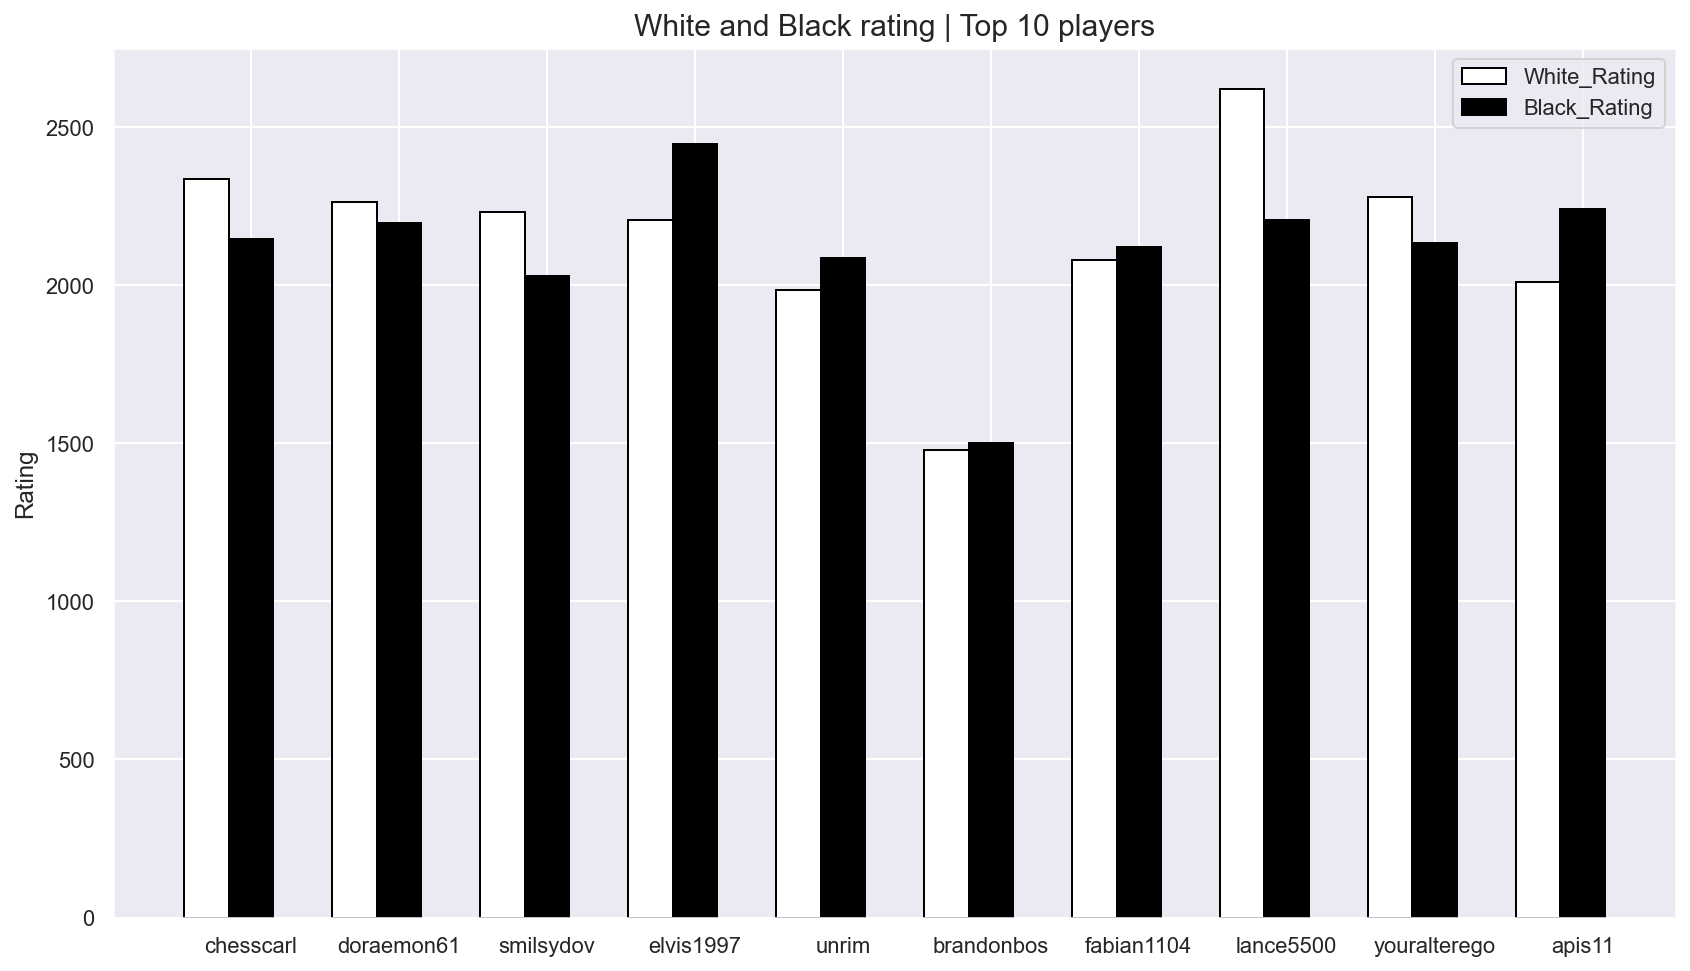

In [97]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the lightgreen bars
bars1 = df_players['Max_White_Rating'].head(10)
 
# Choose the height of the lightblue bars
bars2 = df_players['Max_Black_Rating'].head(10)

# Choose the height of the lightpink bars
#bars3 = df_players['AVG_Rating'].head(5)
 
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'white', edgecolor = 'black', capsize=7, label='White_Rating')

 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'black', edgecolor = 'black', capsize=7, label='Black_Rating')


# Create cyan bars
#plt.bar(r3, bars3, width = barWidth, color = 'lightpink', edgecolor = 'lightpink', capsize=7, label='AVG_RATING')

 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], df_players['Player'].head(10).to_list())
plt.ylabel('Rating')
plt.title('White and Black rating | Top 10 players', size=15)
plt.legend()

plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//rating_by_player.png')
 
# Show graphic
plt.show()

In [98]:
#Save Players ranked table to excel 
df_players.to_excel(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is//top_players.xlsx')

In [100]:
df_players.columns

Index(['Player', 'Games_White', 'Games_Black', 'Total_Games', 'White_Winner',
       'Black_Winner', 'Total_Wins', 'Max_White_Rating', 'Min_White_Rating',
       'Max_Black_Rating', 'Min_Black_Rating', 'AVG_Rating'],
      dtype='object')

## SandBox - Experiments

### Create an spiderplot of the Top 5 players

In [2]:
df_spider = df_players[['Player', 'Total_Games', 'Total_Wins', 'Max_White_Rating', 'AVG_Rating']]

NameError: name 'df_players' is not defined

In [102]:
df_spider = df_spider.head(5)

In [103]:
df_spider = df_spider.reset_index()

In [104]:
df_players.columns

Index(['Player', 'Games_White', 'Games_Black', 'Total_Games', 'White_Winner',
       'Black_Winner', 'Total_Wins', 'Max_White_Rating', 'Min_White_Rating',
       'Max_Black_Rating', 'Min_Black_Rating', 'AVG_Rating'],
      dtype='object')

In [105]:
df_spider = df_players[['Player', 'Games_White', 'Games_Black', 'White_Winner',
       'Black_Winner']]

In [106]:
df_spider = df_spider.head(4)

In [107]:
df_spider = df_spider.reset_index()

In [108]:
df_spider.drop(columns='index', inplace=True)

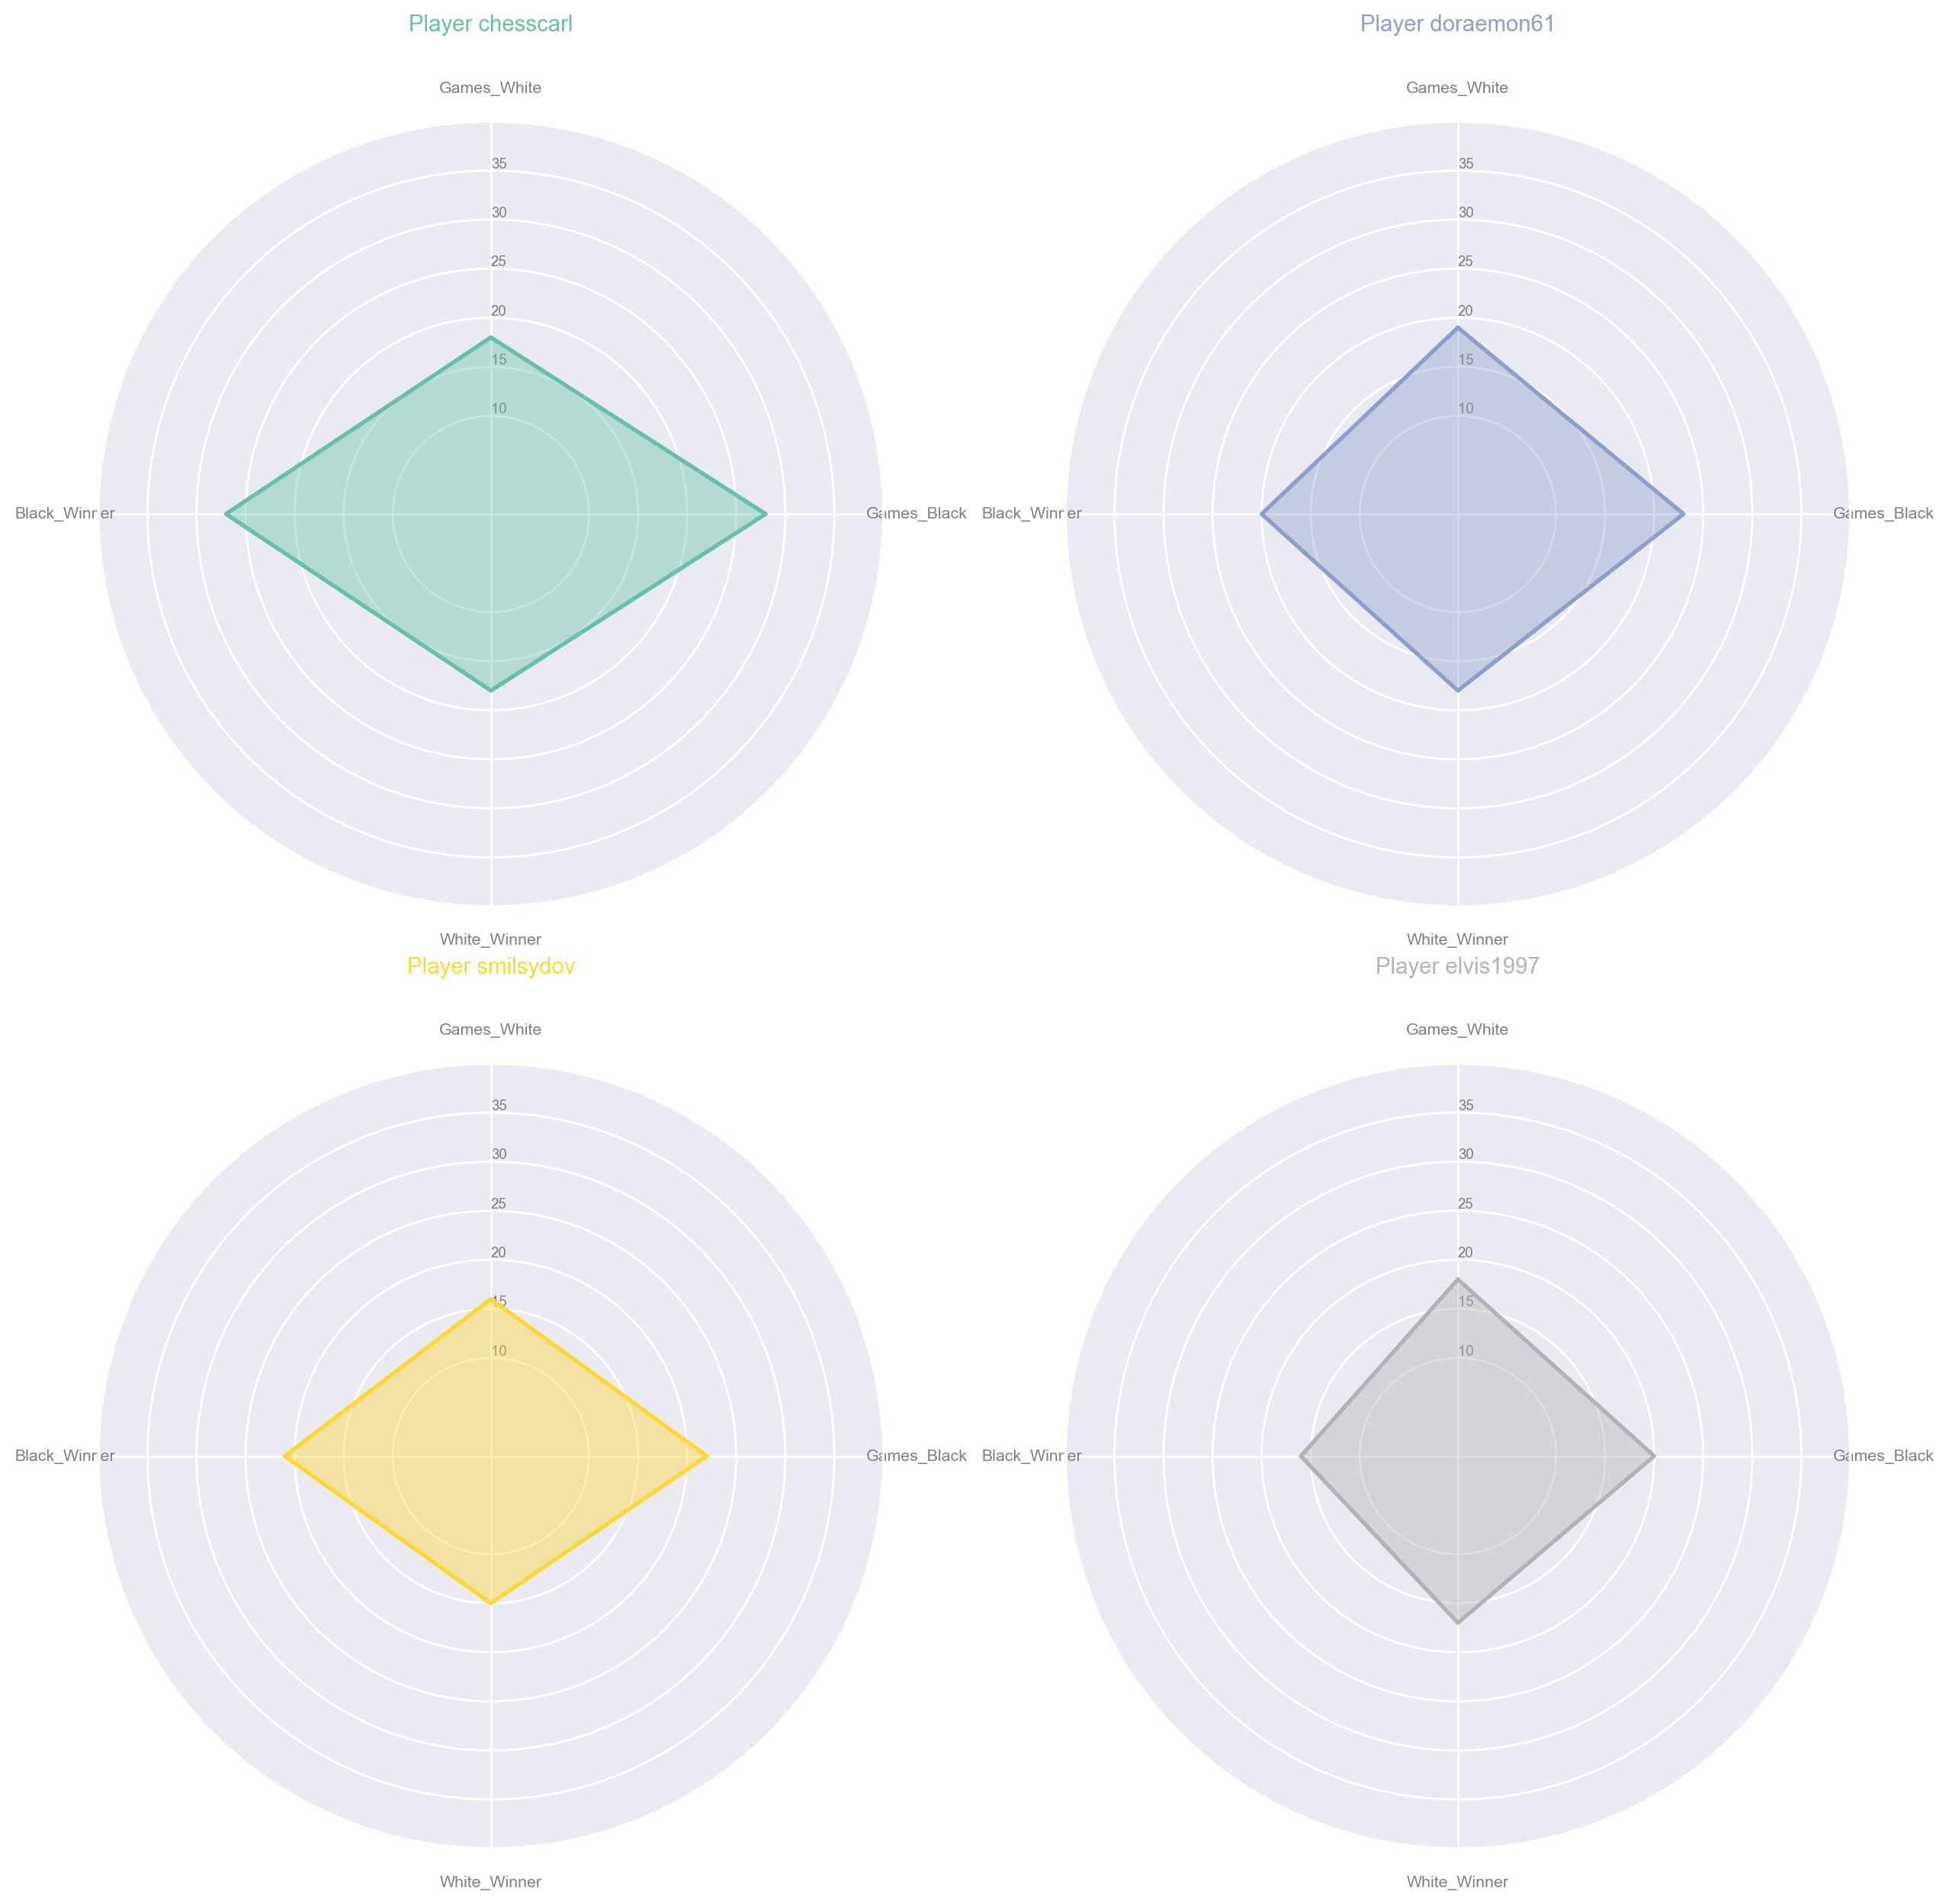

In [109]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data

df_spider
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df_spider)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,15,20,25,30,35], ["10","15","20","25","30", "35"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df_spider.loc[row].drop('Player').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_spider.index))
 
# Loop to plot
for row in range(0, len(df_spider.index)):
    make_spider( row=row, title='Player '+df_spider['Player'][row], color=my_palette(row))

### Display the games in a board by df['moves']

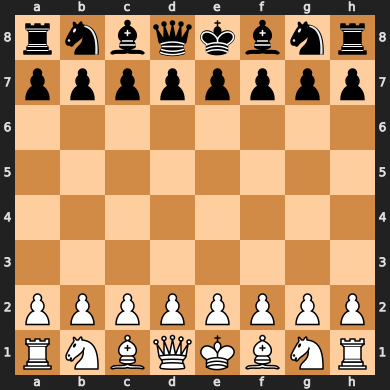

e4


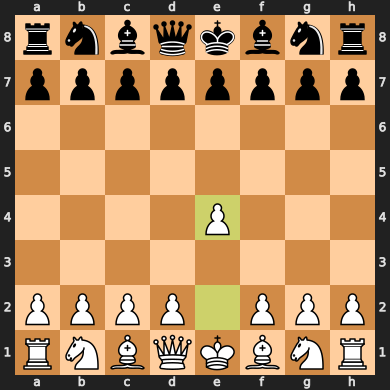

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
e5


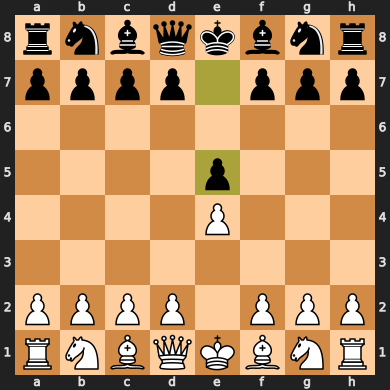

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
d3


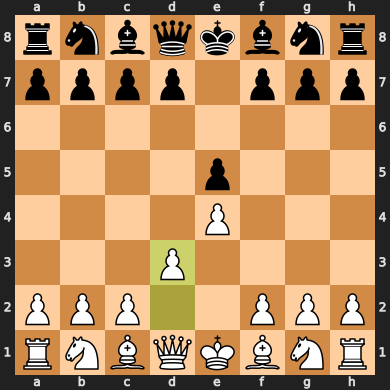

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
d6


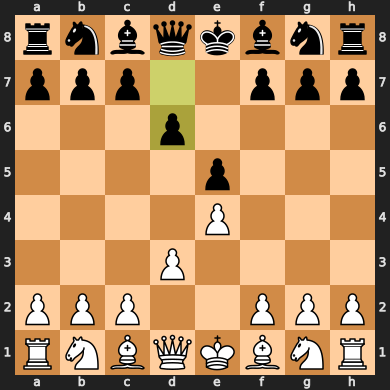

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Be3


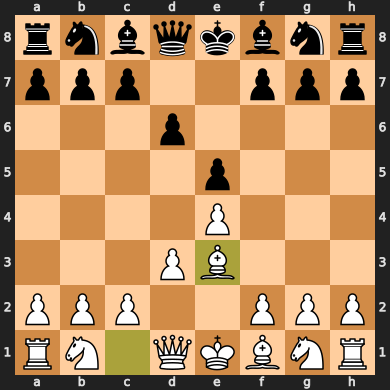

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
c6


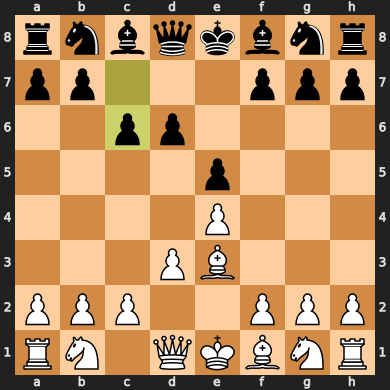

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Be2


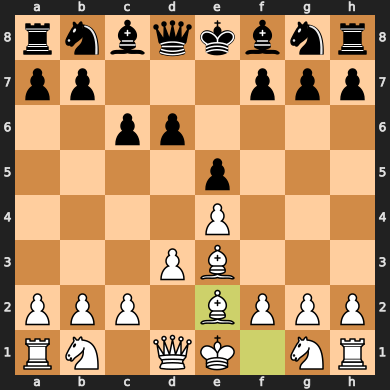

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
b5


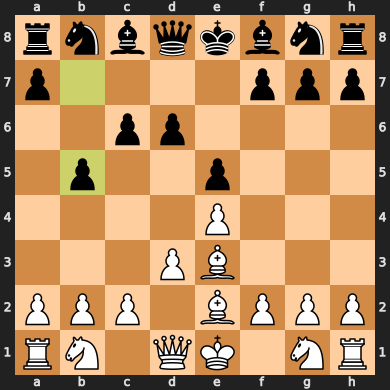

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Nd2


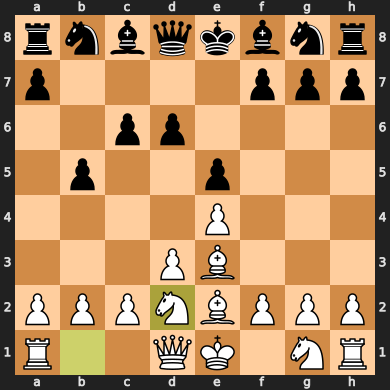

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
a5


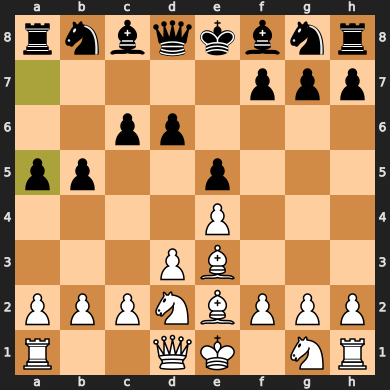

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
a4


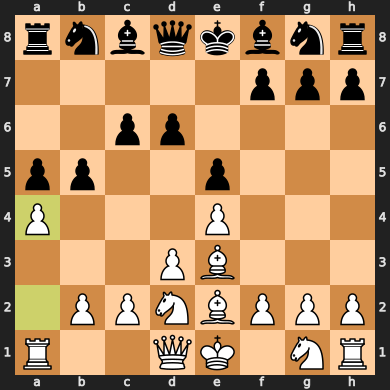

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
c5


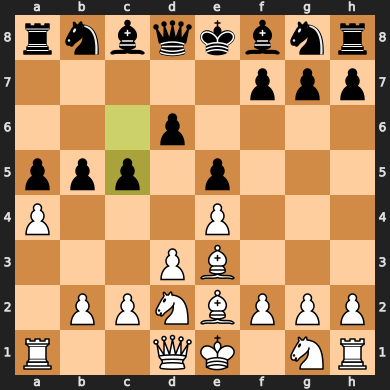

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
axb5


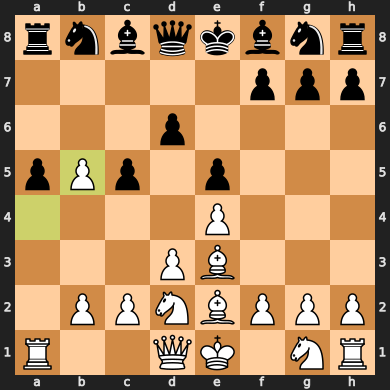

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Nc6


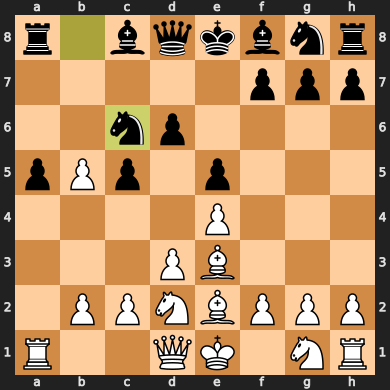

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
bxc6


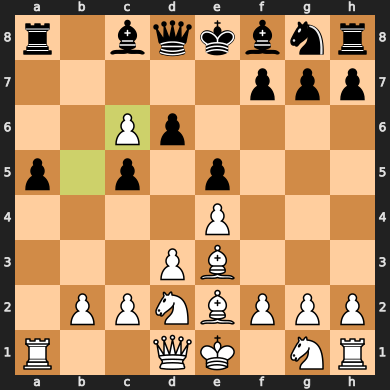

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Ra6


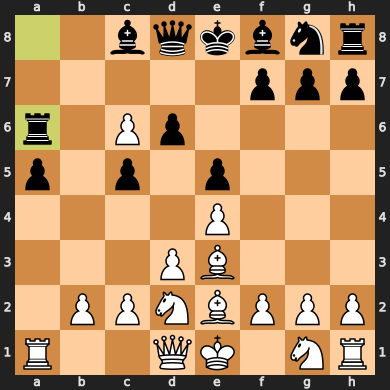

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Nc4


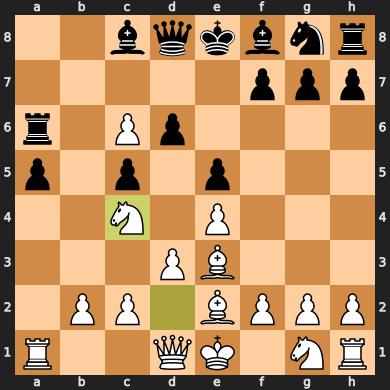

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
a4


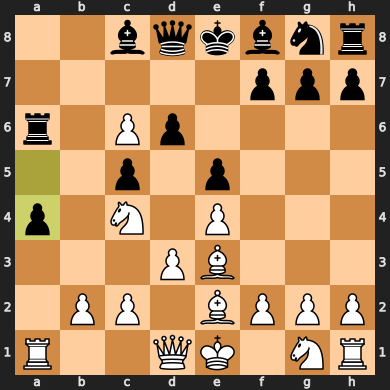

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
c3


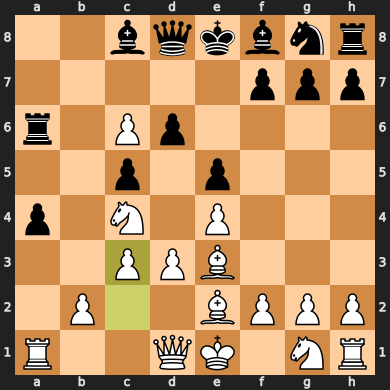

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
a3


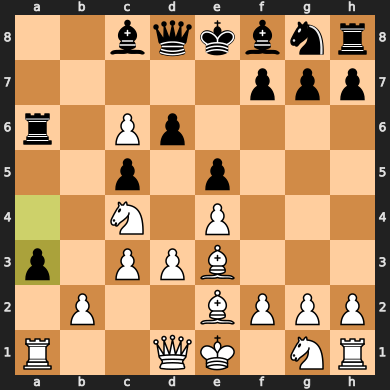

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Nxa3


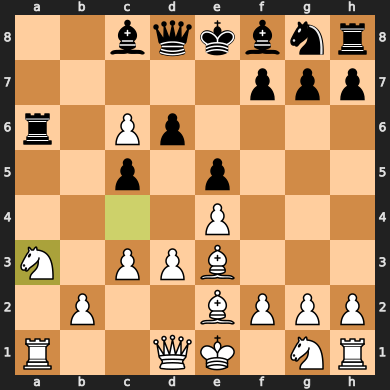

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Rxa3


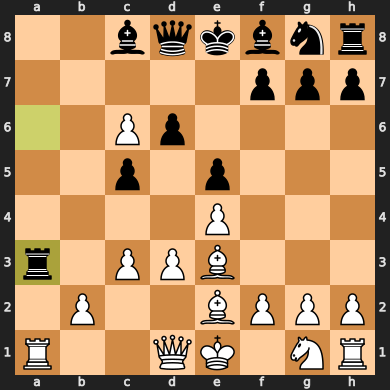

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Rxa3


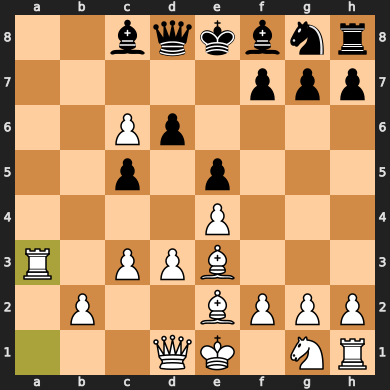

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
c4


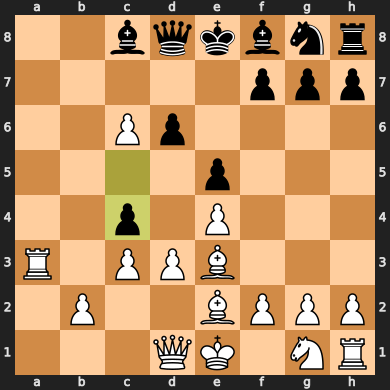

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
dxc4


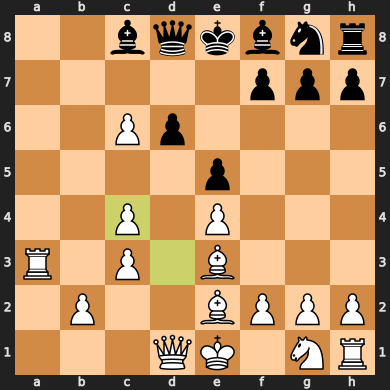

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
d5


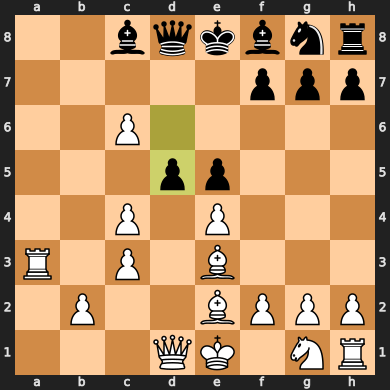

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
cxd5


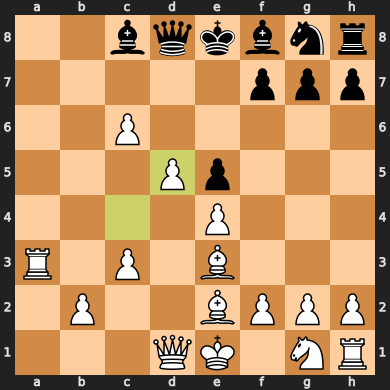

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Qxd5


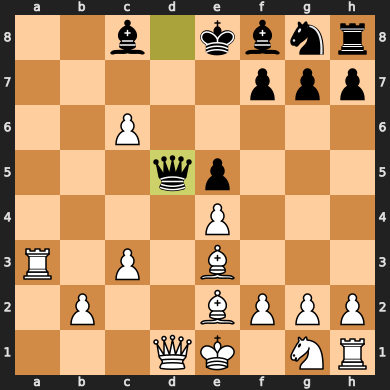

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
exd5


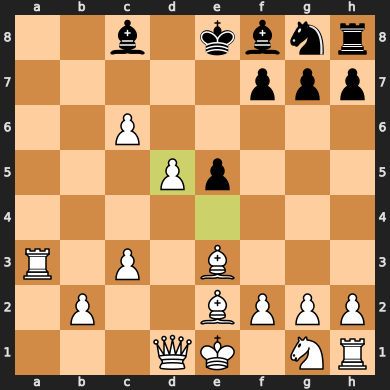

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Be6


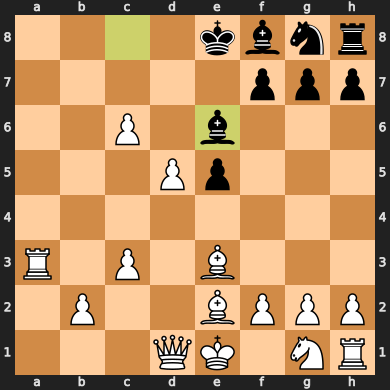

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Ra8+


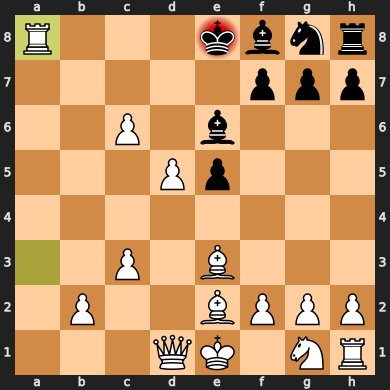

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Ke7


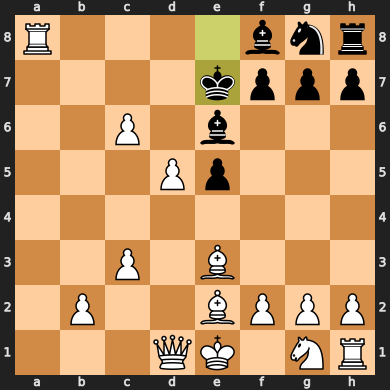

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Bc5+


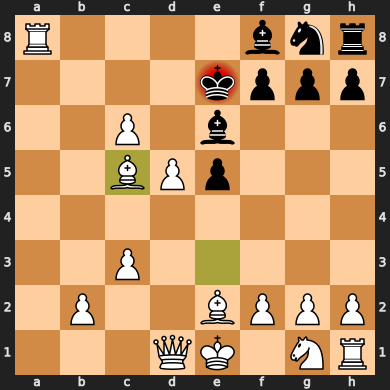

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kf6


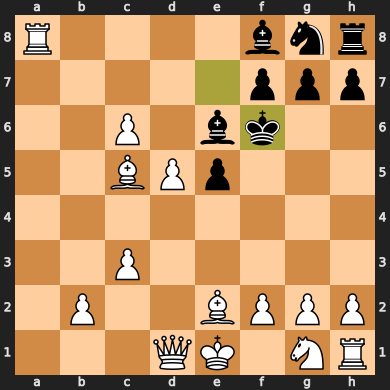

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Bxf8


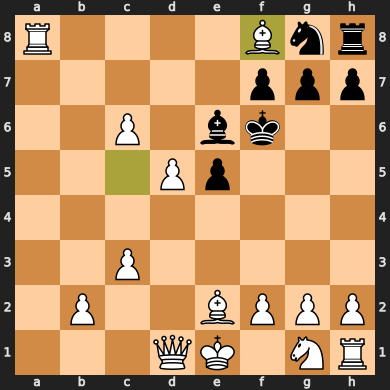

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kg6


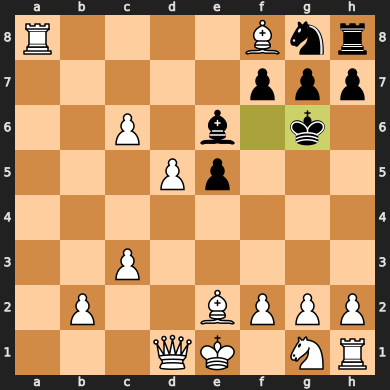

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Bxg7


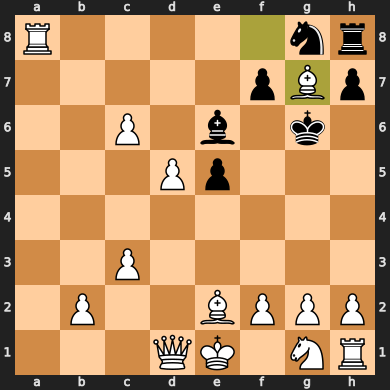

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kxg7


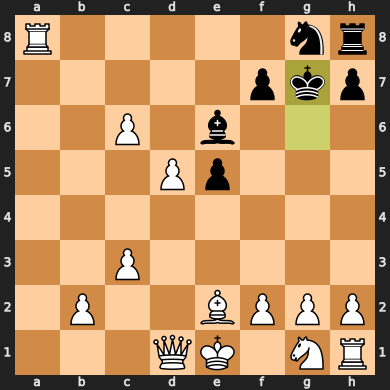

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
dxe6


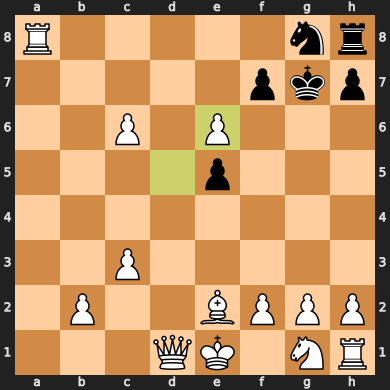

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kh6


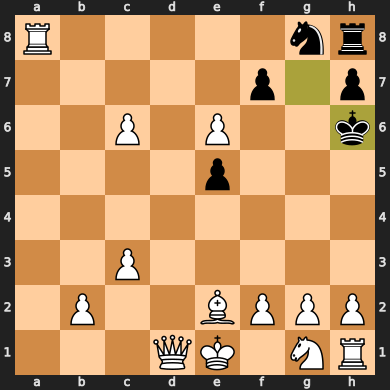

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
exf7


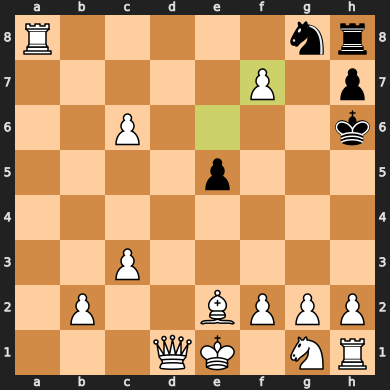

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Nf6


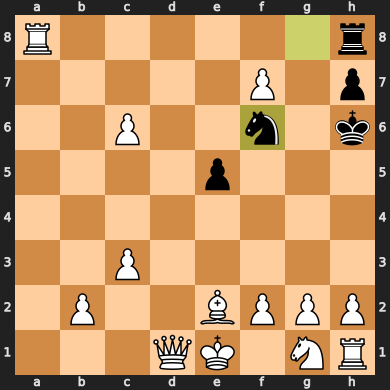

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Rxh8


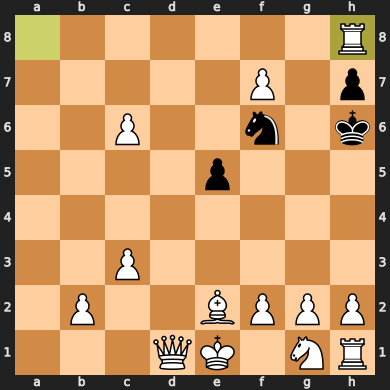

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Nh5


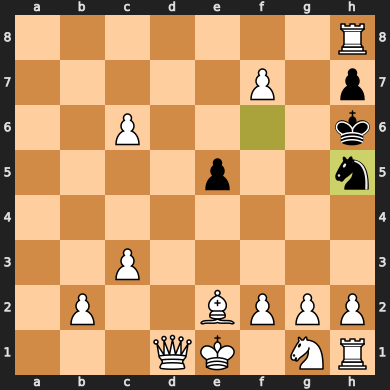

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Bxh5


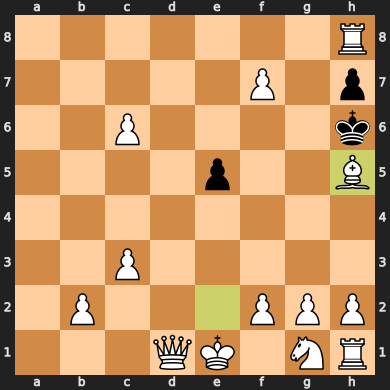

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kg5


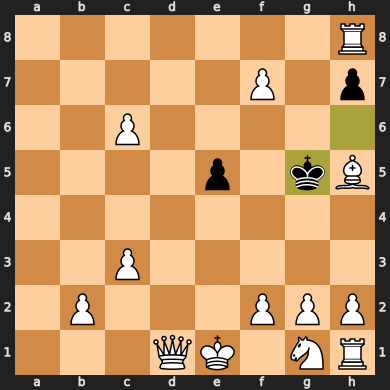

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Rxh7


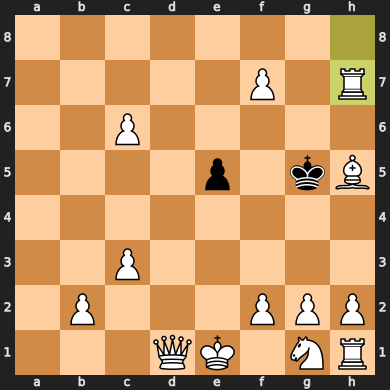

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kf5


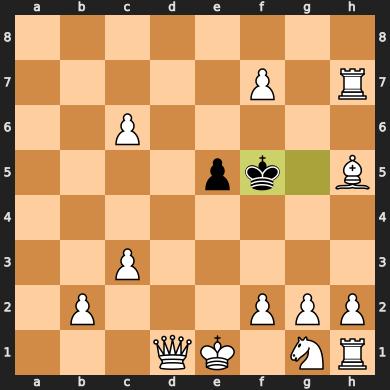

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Qf3+


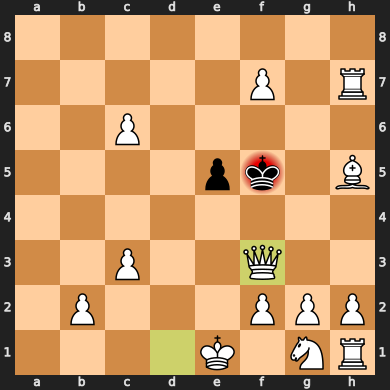

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Ke6


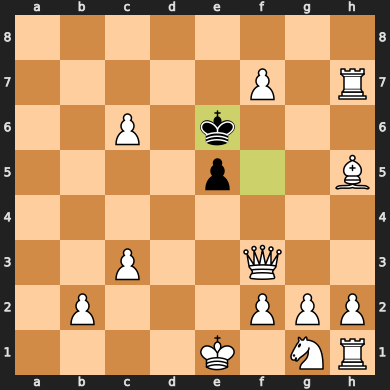

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Bg4+


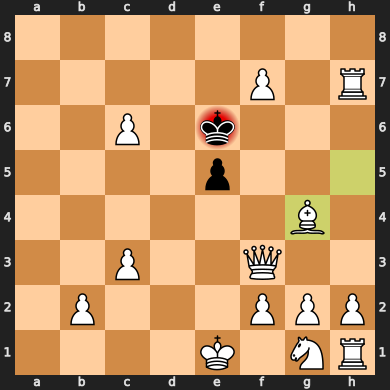

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kd6


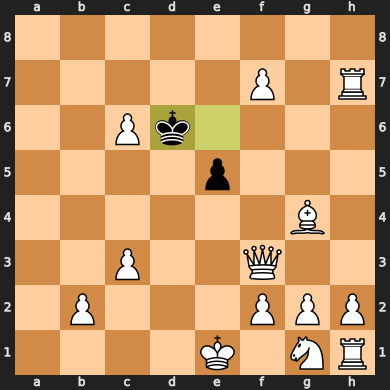

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Rh6+


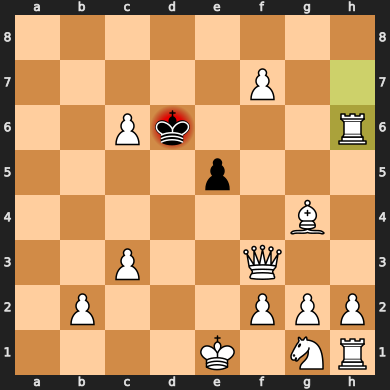

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kc5


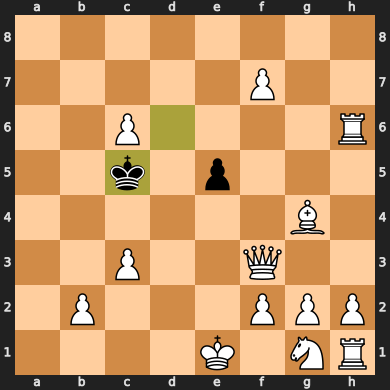

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Qe3+


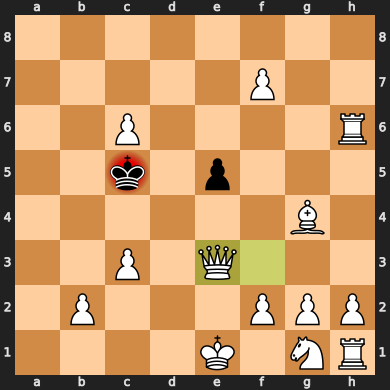

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kb5


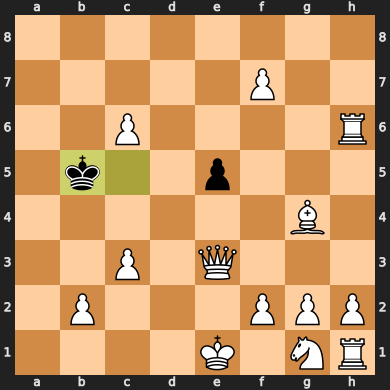

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
c4+


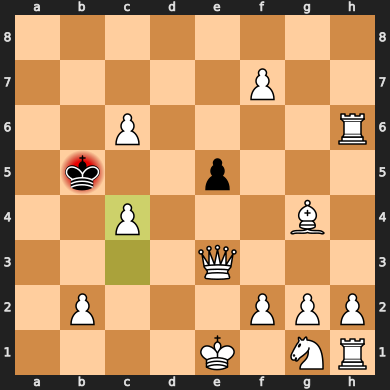

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Kb4


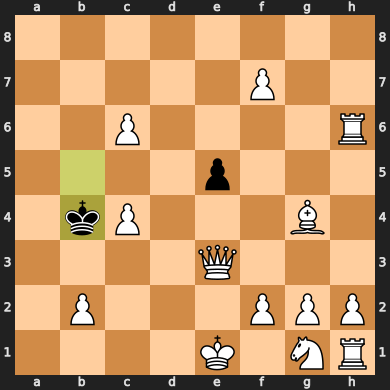

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Qc3+


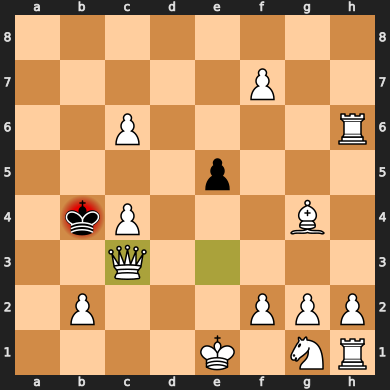

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Ka4


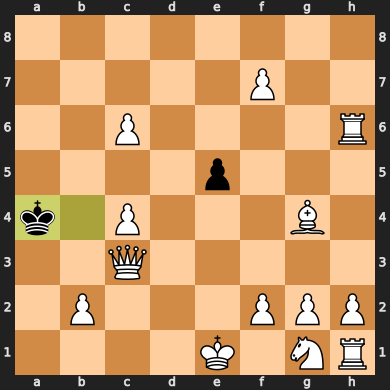

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']
Bd1#


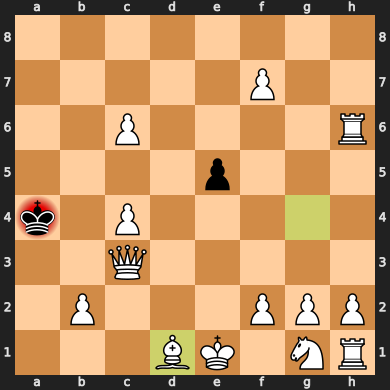

['d4', 'Nc6', 'e4', 'e5', 'f4', 'f6', 'dxe5', 'fxe5', 'fxe5', 'Nxe5', 'Qd4', 'Nc6', 'Qe5+', 'Nxe5', 'c4', 'Bb4+']


In [119]:
board = chess.Board()
board.legal_moves
chess.Move.from_uci("a8a1") in board.legal_moves
display(board)
for i in df['moves'][2].split():
    print(i)
    board.push_san(i)
    display(board)
    time.sleep(2)
    print(df['moves'][1].split())
